<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1451-1450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7507]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [7508]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [12:21:11] non-ring atom 1 marked aromatic


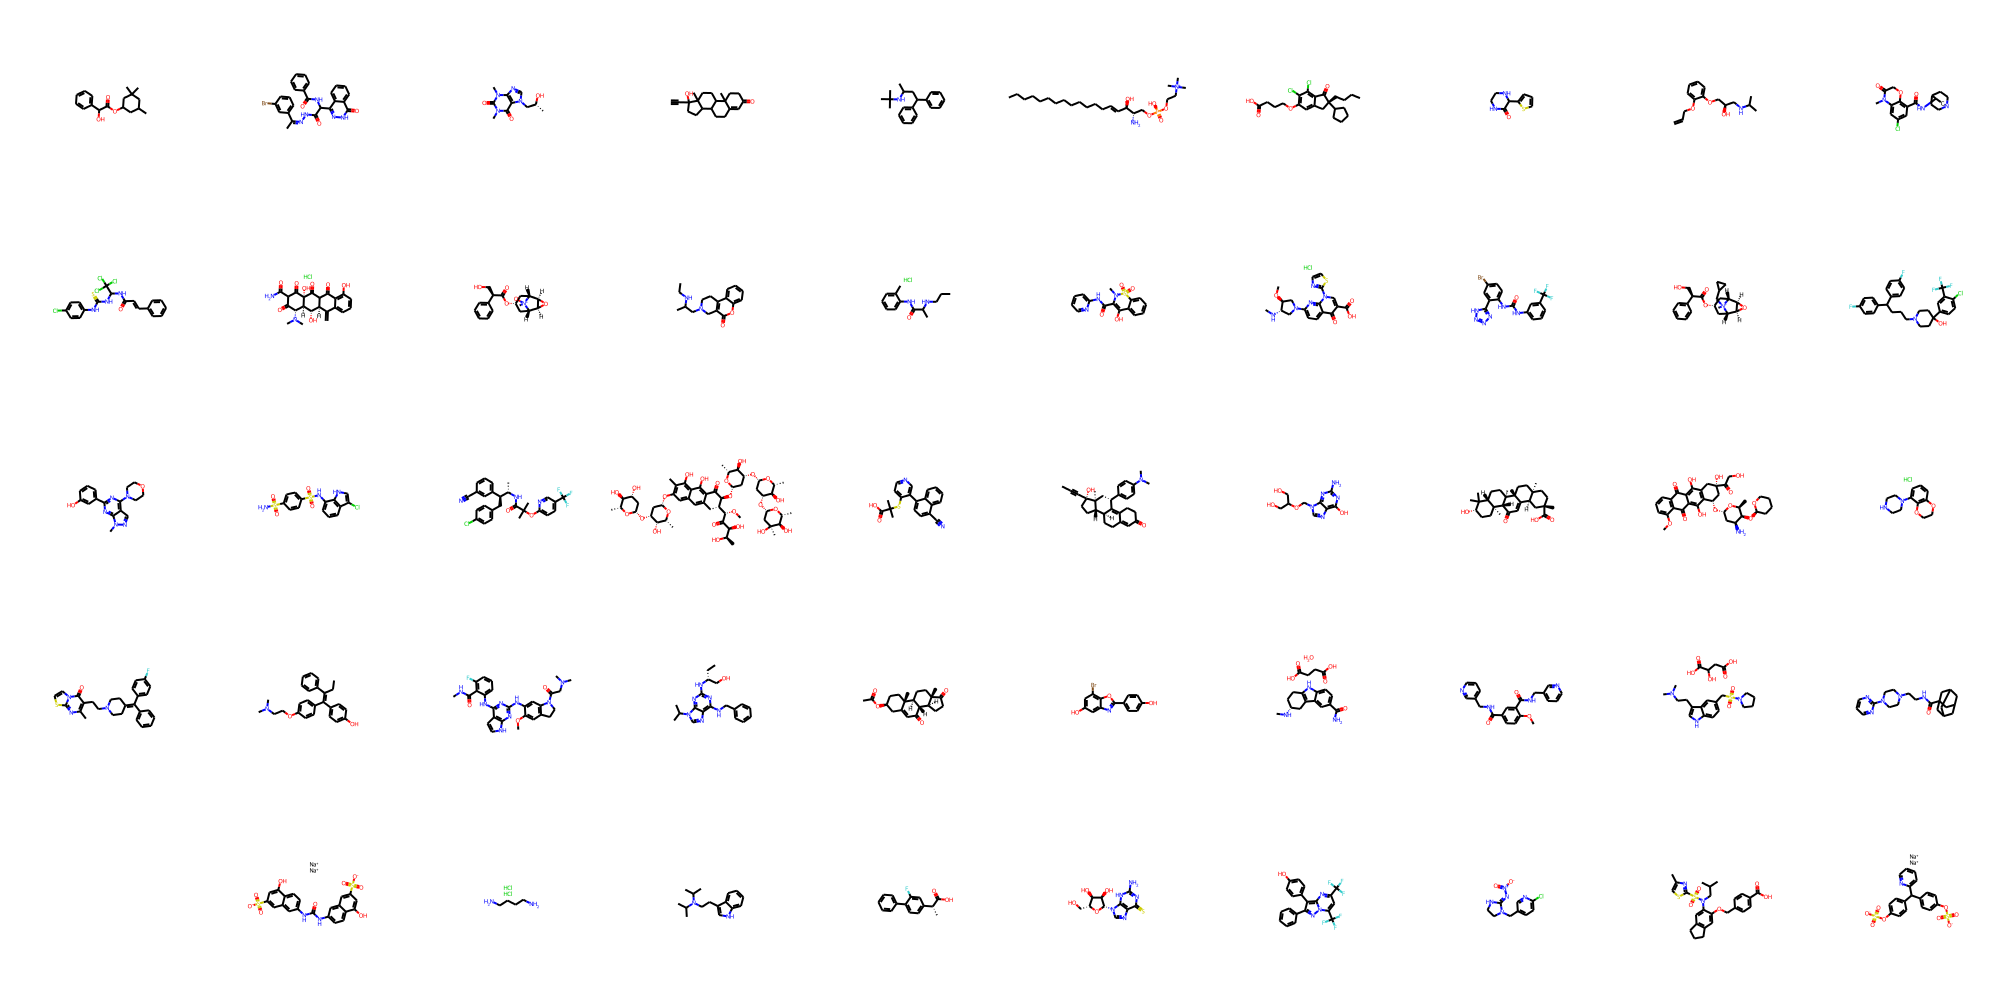

In [7509]:
smiles_list = [

'CC1CC(OC(=O)C(O)c2ccccc2)CC(C)(C)C1',
'C/C(=NNC(=O)C(NC(=O)c1ccccc1)c1n[nH]c(=O)c2ccccc12)c1cccc(Br)c1',
'C[C@@H](O)Cn1cnc2c1c(=O)n(C)c(=O)n2C',
'C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C',
'CC(CC(c1ccccc1)c1ccccc1)NC(C)(C)C',
'CCCCCCCCCCCCC/C=C/[C@@H](O)[C@@H](N)CO[P@](=O)(O)OCC[N+](C)(C)C',
'CCCC[C@@]1(C2CCCC2)Cc2cc(OCCCC(=O)O)c(Cl)c(Cl)c2C1=O',
'O=C1NCCNC1c1cccs1',
'C=CCOc1ccccc1OC[C@H](O)CNC(C)C',
'CN1C(=O)COc2c(C(=O)NC3CN4CCC3CC4)cc(Cl)cc21',
'O=C(/C=C/c1ccccc1)NC(NC(=S)Nc1ccc(Cl)cc1)C(Cl)(Cl)Cl',
'C=C1c2cccc(O)c2C(=O)C2C(=O)[C@]3(O)C(=O)C(C(N)=O)C(=O)[C@@H](N(C)C)[C@@H]3[C@@H](O)[C@H]12.Cl',
'C[N+]1([O-])[C@H]2C[C@H](OC(=O)[C@H](CO)c3ccccc3)C[C@@H]1[C@H]1O[C@@H]21',
'CCNC(C)CN1CCc2c(c(=O)oc3ccccc23)C1',
'CCCNC(C)C(=O)Nc1ccccc1C.Cl',
'CN1C(C(=O)Nc2ccccn2)=C(O)c2ccccc2S1(=O)=O',
'CN[C@H]1CN(c2ccc3c(=O)c(C(=O)O)cn(-c4nccs4)c3n2)C[C@@H]1OC.Cl',
'O=C(Nc1cccc(C(F)(F)F)c1)Nc1ccc(Br)cc1-c1nnn[nH]1',
'C[N+]1(CC2CC2)[C@H]2C[C@H](OC(=O)[C@H](CO)c3ccccc3)C[C@@H]1[C@H]1O[C@@H]21',
'OC1(c2ccc(Cl)c(C(F)(F)F)c2)CCN(CCCC(c2ccc(F)cc2)c2ccc(F)cc2)CC1',
'Cn1ncc2c(N3CCOCC3)nc(-c3cccc(O)c3)nc21',
'NS(=O)(=O)c1ccc(S(=O)(=O)Nc2cccc3c(Cl)c[nH]c23)cc1',
'C[C@H](NC(=O)C(C)(C)Oc1ccc(C(F)(F)F)cn1)[C@@H](Cc1ccc(Cl)cc1)c1cccc(C#N)c1',
'CO[C@H](C(=O)[C@@H](O)[C@@H](C)O)[C@@H]1Cc2cc3cc(O[C@H]4C[C@@H](O[C@H]5C[C@@H](O)[C@H](O)[C@@H](C)O5)[C@@H](O)[C@@H](C)O4)c(C)c(O)c3c(O)c2C(=O)[C@H]1O[C@H]1C[C@@H](O[C@H]2C[C@@H](O[C@H]3C[C@](C)(O)[C@H](O)[C@@H](C)O3)[C@H](O)[C@@H](C)O2)[C@H](O)[C@@H](C)O1',
'CC(C)(Sc1ccncc1-c1ccc(C#N)c2ccccc12)C(=O)O',
'CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[C@@H](c3ccc(N(C)C)cc3)C[C@@]21C',
'Nc1nc(O)c2ncn(COC(CO)CO)c2n1',
'CC1(C)[C@@H](O)CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H]2C(=O)C=C2[C@@H]3C[C@@](C)(C(=O)O)CC[C@]3(C)CC[C@]21C',
'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)(C(=O)CO)C[C@@H]3O[C@H]1C[C@H](N)[C@H](O[C@@H]2CCCCO2)[C@H](C)O1',
'Cl.c1cc2c(c(N3CCNCC3)c1)OCCO2',
'Cc1nc2sccn2c(=O)c1CCN1CCC(=C(c2ccccc2)c2ccc(F)cc2)CC1',
'CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCN(C)C)cc1)c1ccccc1',
'CNC(=O)c1c(F)cccc1Nc1nc(Nc2cc3c(cc2OC)CCN3C(=O)CN(C)C)nc2[nH]ccc12',
'CC[C@H](CO)Nc1nc(NCc2ccccc2)c2ncn(C(C)C)c2n1',
'CC(=O)O[C@H]1CC[C@@]2(C)C(=CC(=O)[C@H]3[C@@H]4CCC(=O)[C@@]4(C)CC[C@@H]32)C1',
'Oc1ccc(-c2nc3cc(O)cc(Br)c3o2)cc1',
'CN[C@@H]1CCc2[nH]c3ccc(C(N)=O)cc3c2C1.O.O=C(O)CCC(=O)O',
'COc1ccc(C(=O)NCc2cccnc2)cc1C(=O)NCc1cccnc1',
'CN(C)CCc1c[nH]c2ccc(CS(=O)(=O)N3CCCC3)cc12.O=C(O)CC(O)C(=O)O',
'O=C(NCCN1CCN(c2ncccn2)CC1)C12CC3CC(CC(C3)C1)C2',
'No Data',
'O=C(Nc1ccc2c(O)cc(S(=O)(=O)[O-])cc2c1)Nc1ccc2c(O)cc(S(=O)(=O)[O-])cc2c1.[Na+].[Na+]',
'Cl.Cl.NCCCCN',
'CC(C)N(CCc1c[nH]c2ccccc12)C(C)C',
'C[C@@H](C(=O)O)c1ccc(-c2ccccc2)c(F)c1',
'Nc1nc(=S)c2ncn([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)c2[nH]1',
'Oc1ccc(-c2c(-c3ccccc3)nn3c(C(F)(F)F)cc(C(F)(F)F)nc23)cc1',
'O=[N+]([O-])/N=C1NCCN1Cc1ccc(Cl)nc1',
'Cc1csc(S(=O)(=O)N(CC(C)C)c2cc3c(cc2OCc2ccc(C(=O)O)cc2)CCC3)n1',
'O=S(=O)([O-])Oc1ccc(C(c2ccc(OS(=O)(=O)[O-])cc2)c2ccccn2)cc1.[Na+].[Na+]',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



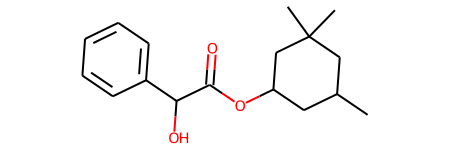

In [7510]:
M1 = mol_list [0]
M1

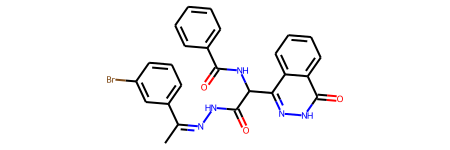

In [7511]:
M2 = mol_list [1]
M2

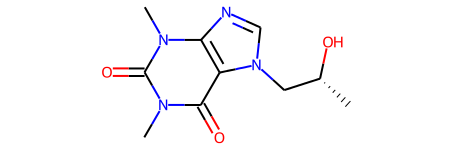

In [7512]:
M3 = mol_list [2]
M3

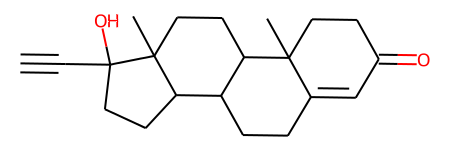

In [7513]:
M4 = mol_list [3]
M4

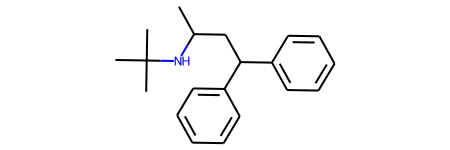

In [7514]:
M5 = mol_list [4]
M5

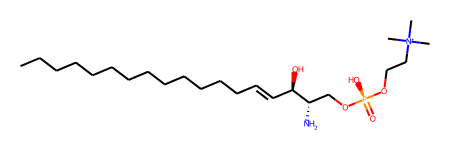

In [7515]:
M6 = mol_list [5]
M6

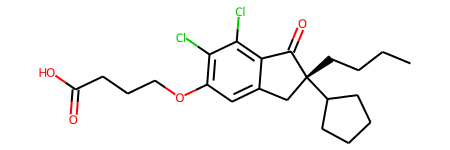

In [7516]:
M7 = mol_list [6]
M7

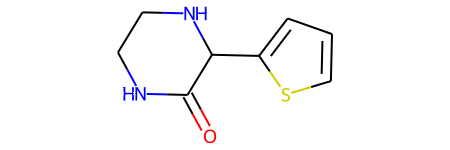

In [7517]:
M8 = mol_list [7]
M8

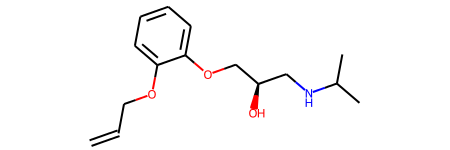

In [7518]:
M9 = mol_list [8]
M9

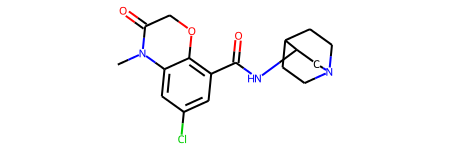

In [7519]:
M10 = mol_list [9]
M10

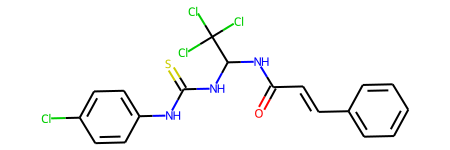

In [7520]:
M11 = mol_list [10]
M11

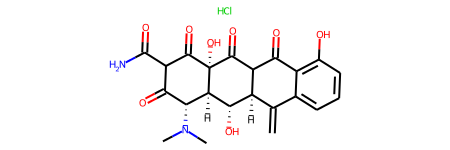

In [7521]:
M12 = mol_list [11]
M12

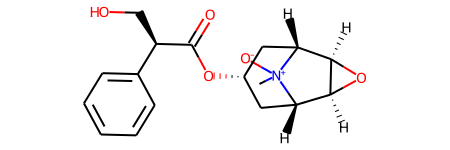

In [7522]:
M13 = mol_list [12]
M13

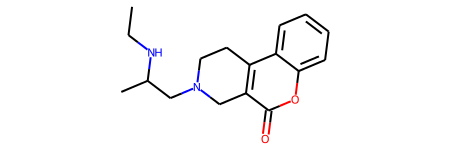

In [7523]:
M14 = mol_list [13]
M14

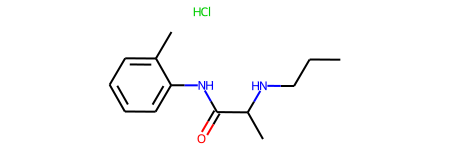

In [7524]:
M15 = mol_list [14]
M15

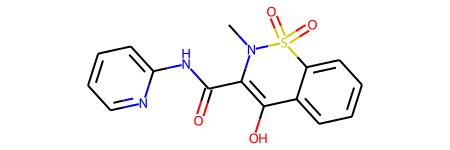

In [7525]:
M16 = mol_list [15]
M16

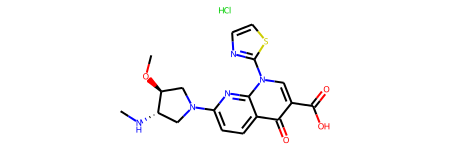

In [7526]:
M17 = mol_list [16]
M17

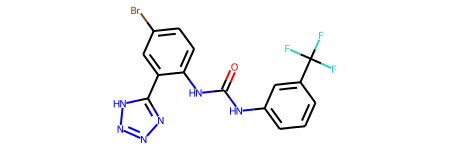

In [7527]:
M18 = mol_list [17]
M18

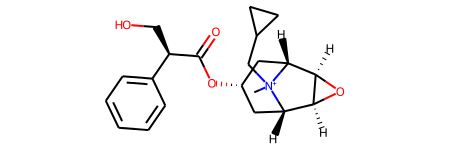

In [7528]:
M19 = mol_list [18]
M19

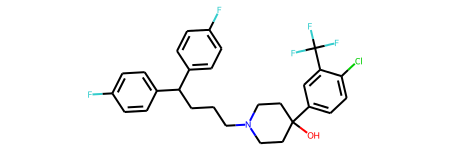

In [7529]:
M20 = mol_list [19]
M20

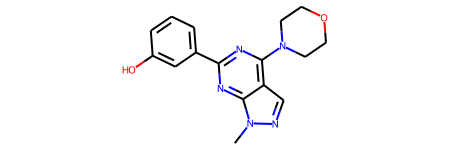

In [7530]:
M21 = mol_list [20]
M21

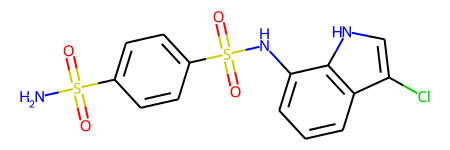

In [7531]:
M22 = mol_list [21]
M22

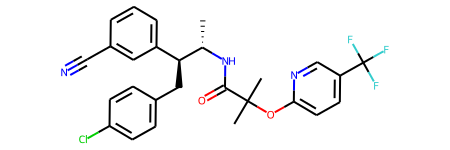

In [7532]:
M23 = mol_list [22]
M23

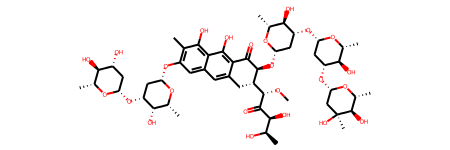

In [7533]:
M24 = mol_list [23]
M24

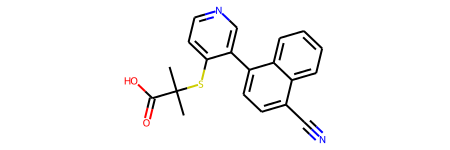

In [7534]:
M25 = mol_list [24]
M25

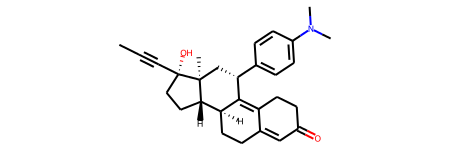

In [7535]:
M26 = mol_list [25]
M26

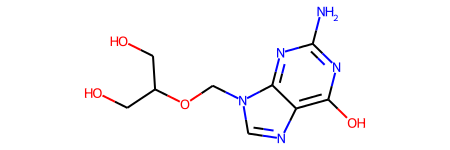

In [7536]:
M27 = mol_list [26]
M27

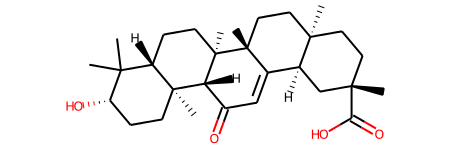

In [7537]:
M28 = mol_list [27]
M28

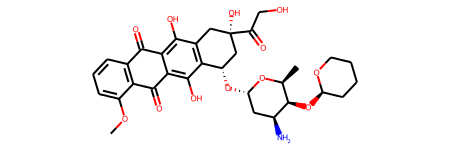

In [7538]:
M29 = mol_list [28]
M29

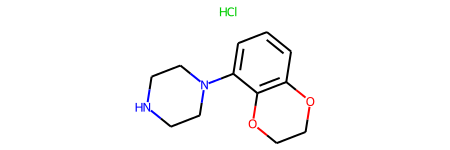

In [7539]:
M30 = mol_list [29]
M30

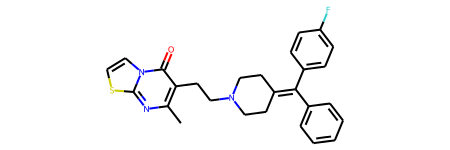

In [7540]:
M31 = mol_list [30]
M31

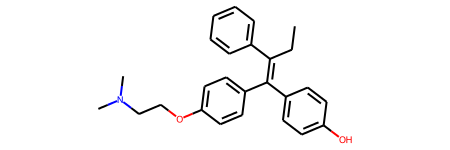

In [7541]:
M32 = mol_list [31]
M32

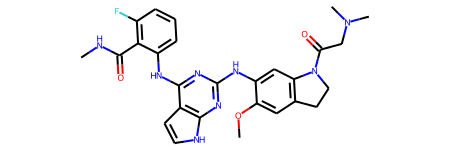

In [7542]:
M33 = mol_list [32]
M33

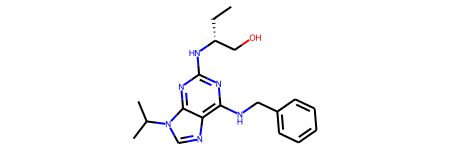

In [7543]:
M34 = mol_list [33]
M34

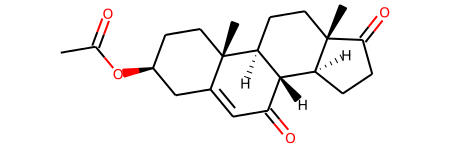

In [7544]:
M35 = mol_list [34]
M35

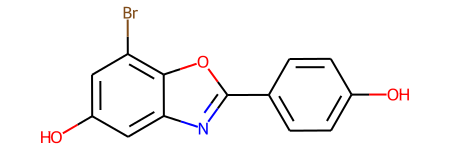

In [7545]:
M36 = mol_list [35]
M36

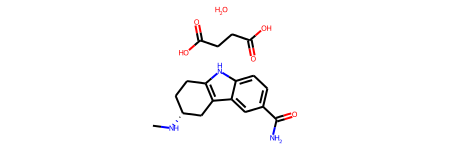

In [7546]:
M37= mol_list [36]
M37

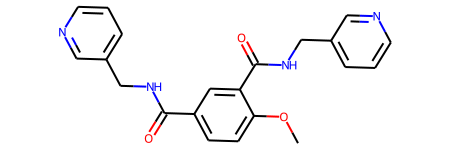

In [7547]:
M38= mol_list [37]
M38

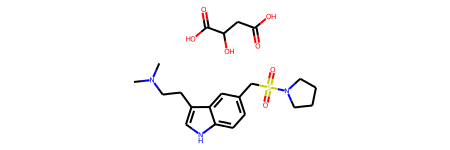

In [7548]:
M39= mol_list [38]
M39

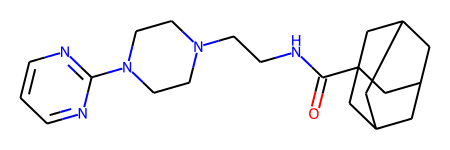

In [7549]:
M40= mol_list [39]
M40

In [7550]:
M41= mol_list [40]
M41

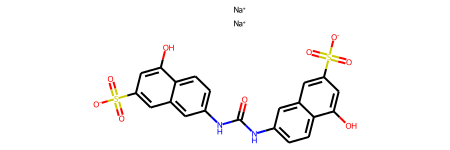

In [7551]:
M42= mol_list [41]
M42

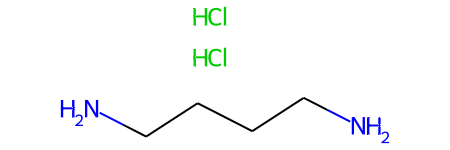

In [7552]:
M43= mol_list [42]
M43

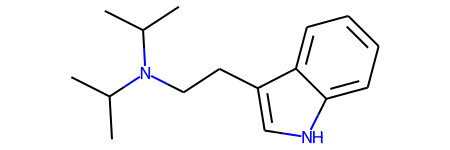

In [7553]:
M44= mol_list [43]
M44

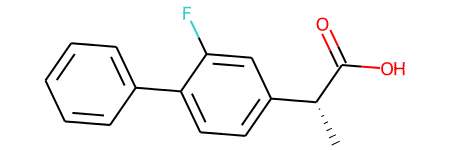

In [7554]:
M45= mol_list [44]
M45

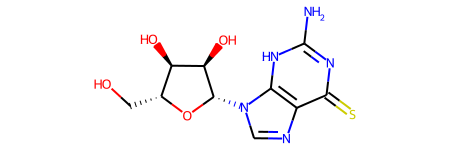

In [7555]:
M46= mol_list [45]
M46

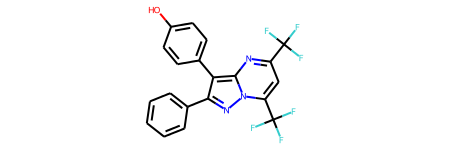

In [7556]:
M47= mol_list [46]
M47

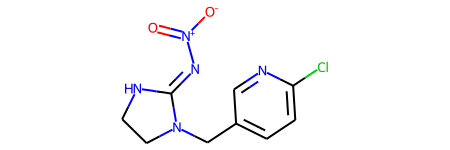

In [7557]:
M48= mol_list [47]
M48

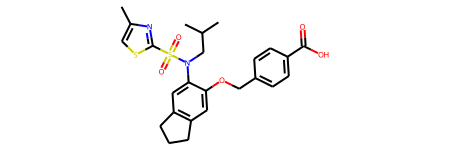

In [7558]:
M49= mol_list [48]
M49

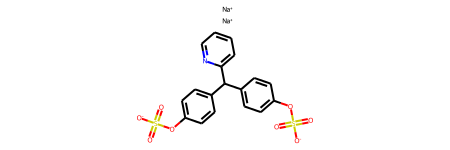

In [7559]:
M50= mol_list [49]
M50

In [7560]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 33,
 36,
 41,
 64,
 102,
 119,
 124,
 147,
 175,
 193,
 227,
 250,
 268,
 285,
 341,
 356,
 365,
 367,
 389,
 390,
 463,
 557,
 650,
 679,
 693,
 695,
 698,
 726,
 807,
 825,
 849,
 893,
 912,
 926,
 963,
 967,
 1019]

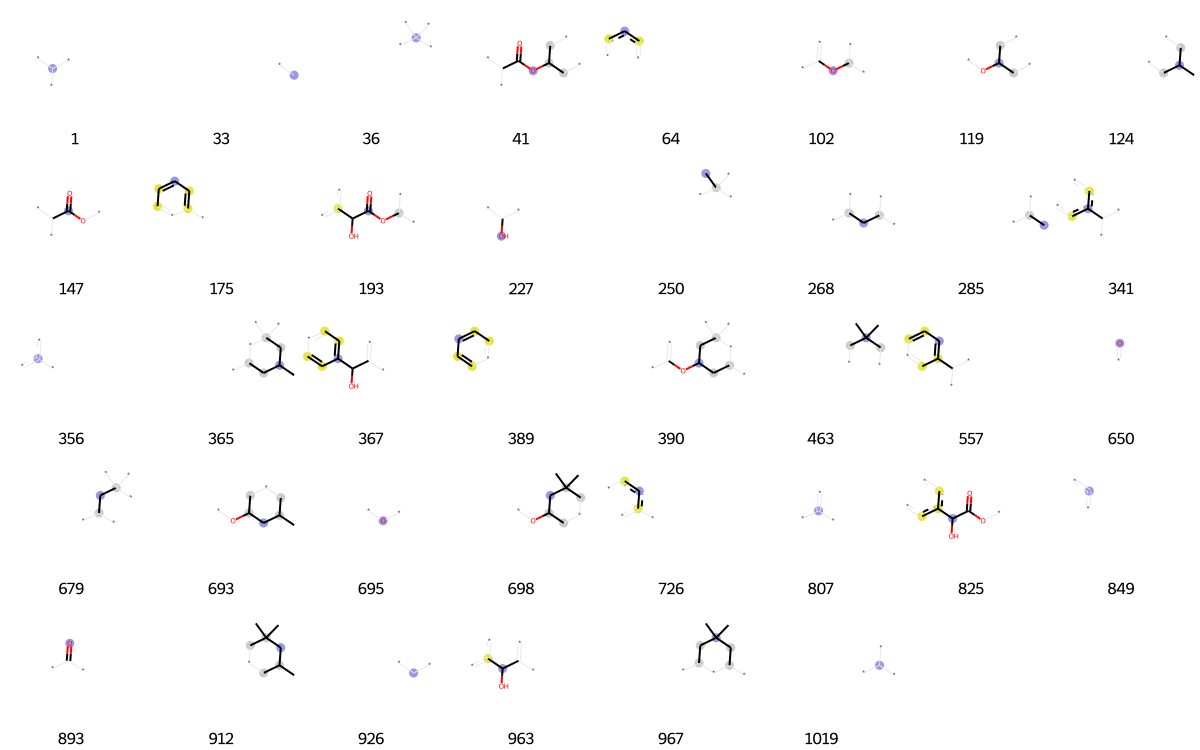

In [7561]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [7562]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[0,
 1,
 15,
 33,
 64,
 74,
 78,
 90,
 110,
 117,
 128,
 175,
 223,
 284,
 294,
 312,
 314,
 318,
 333,
 356,
 361,
 378,
 389,
 485,
 486,
 537,
 549,
 573,
 607,
 641,
 650,
 659,
 700,
 725,
 726,
 728,
 731,
 750,
 755,
 766,
 807,
 847,
 849,
 875,
 893,
 902,
 906,
 909,
 940,
 961,
 980,
 985,
 991,
 1017]

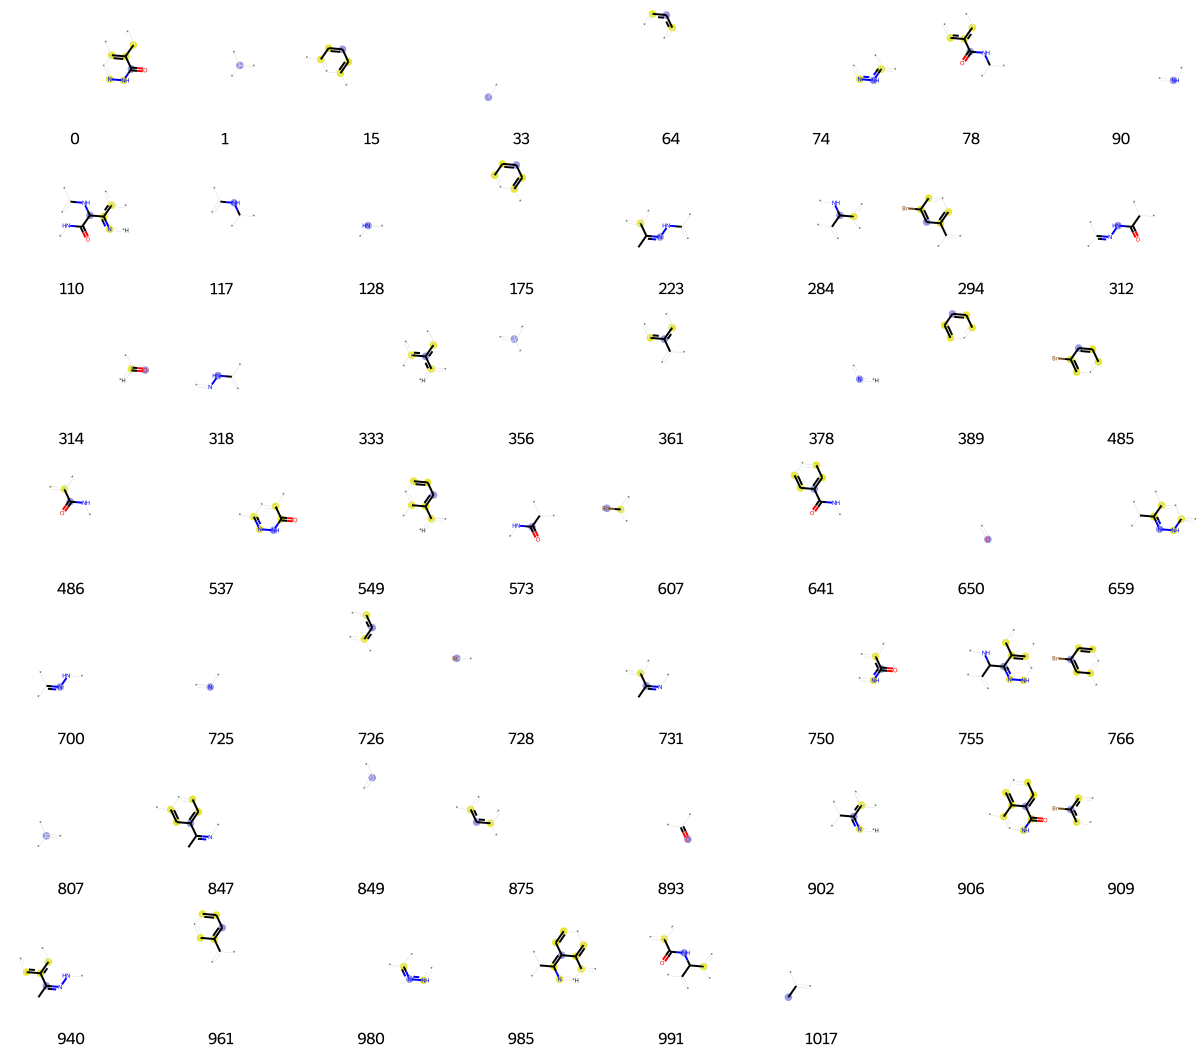

In [7563]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [7564]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[0,
 1,
 33,
 80,
 121,
 179,
 227,
 234,
 283,
 314,
 336,
 351,
 356,
 378,
 400,
 405,
 416,
 420,
 428,
 431,
 478,
 504,
 564,
 650,
 672,
 771,
 807,
 849,
 898,
 913,
 932,
 935]

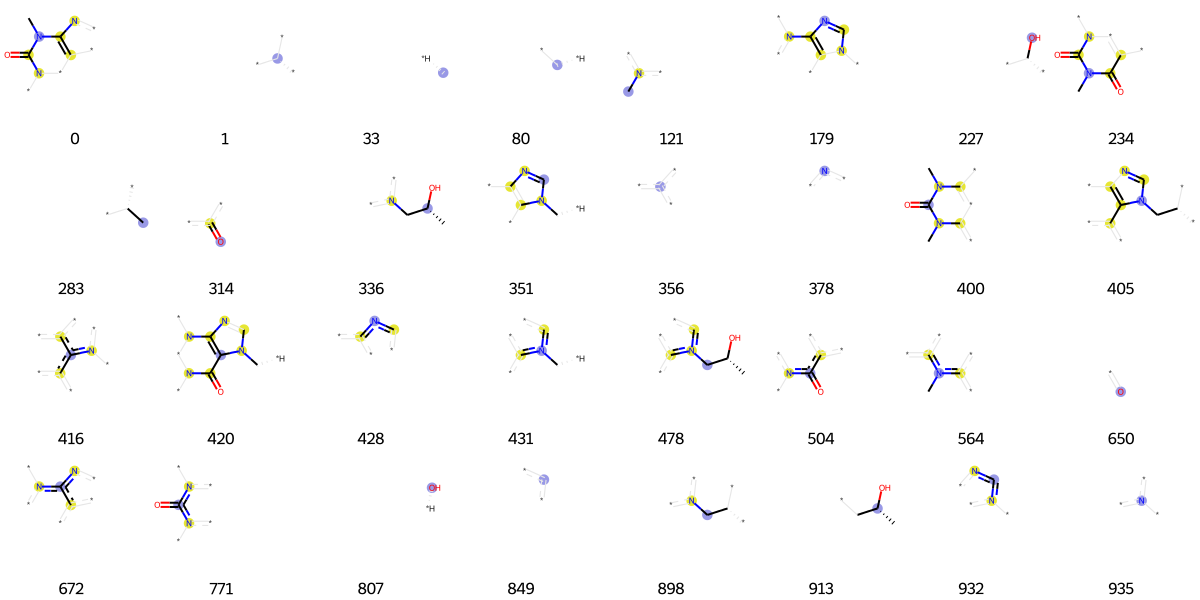

In [7565]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [7566]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[7,
 16,
 33,
 36,
 71,
 75,
 84,
 88,
 130,
 138,
 182,
 195,
 242,
 250,
 262,
 289,
 301,
 314,
 356,
 364,
 408,
 412,
 441,
 479,
 504,
 507,
 519,
 529,
 555,
 622,
 649,
 650,
 674,
 714,
 807,
 841,
 849,
 860,
 909,
 915,
 926,
 974,
 1019]

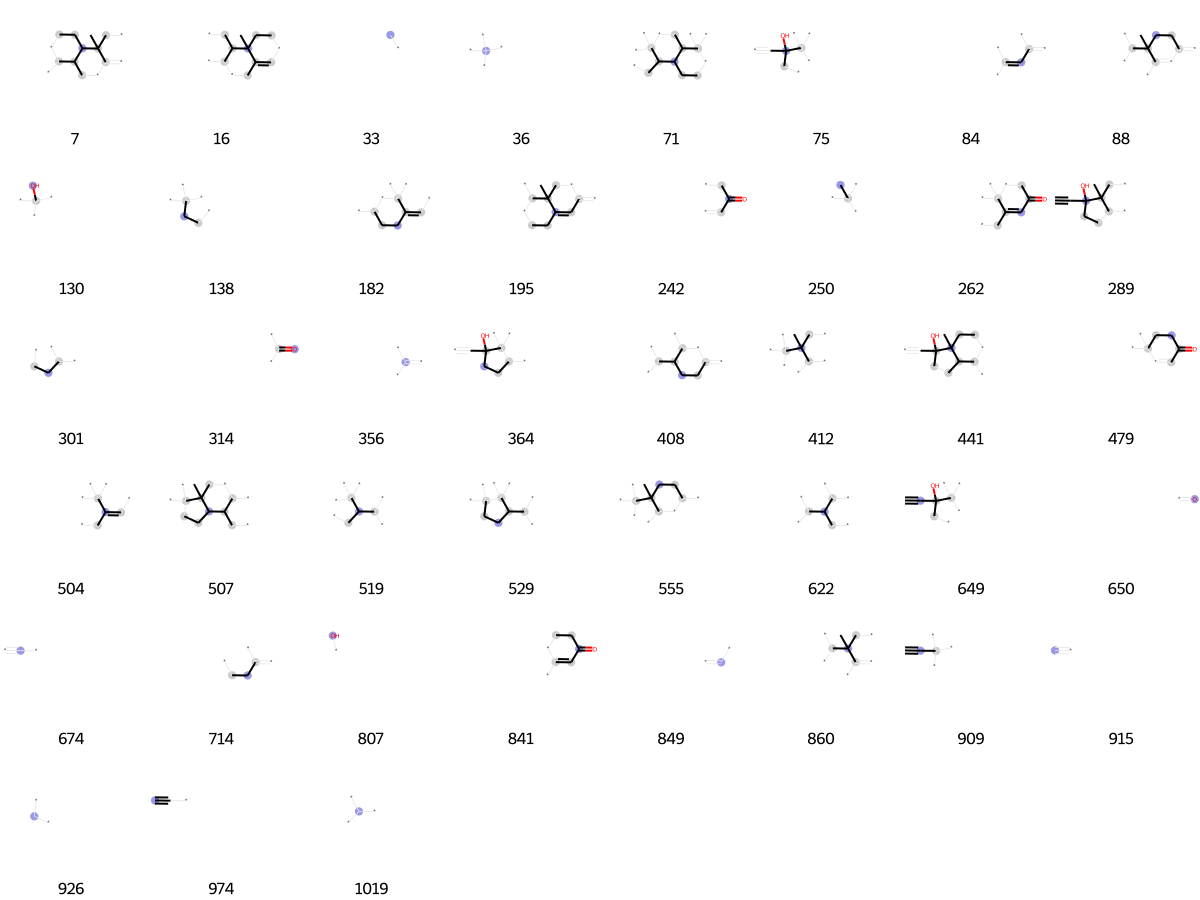

In [7567]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [7568]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 33,
 54,
 64,
 75,
 80,
 114,
 128,
 152,
 175,
 283,
 341,
 356,
 389,
 392,
 557,
 566,
 603,
 633,
 680,
 724,
 726,
 849,
 932,
 994]

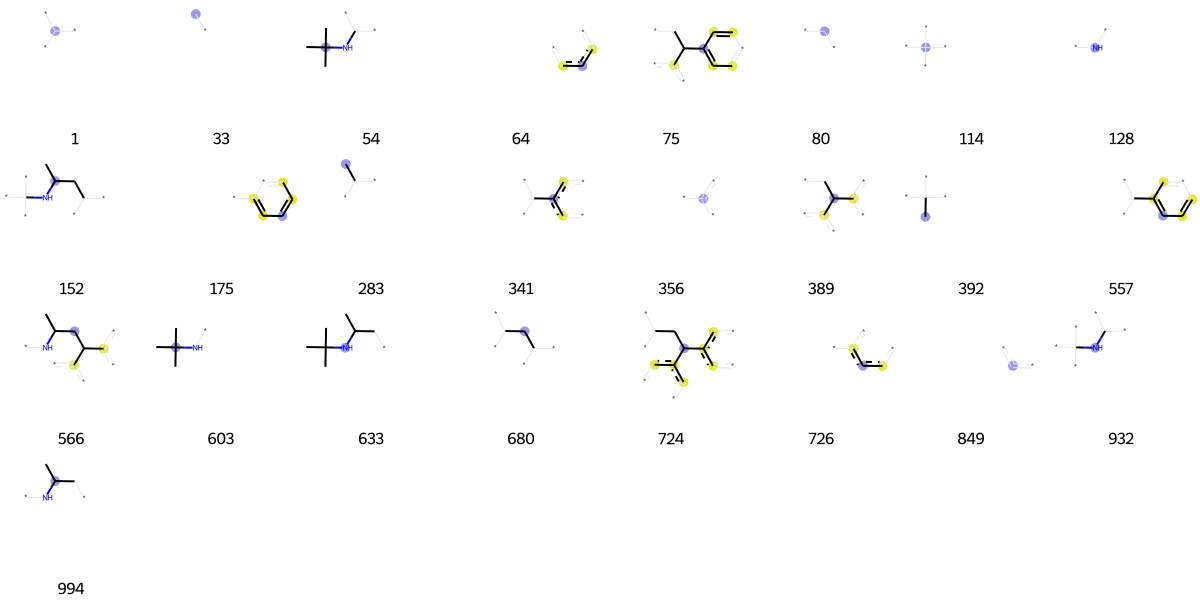

In [7569]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [7570]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[1,
 10,
 13,
 33,
 80,
 118,
 119,
 147,
 192,
 227,
 278,
 294,
 319,
 332,
 336,
 401,
 405,
 414,
 416,
 420,
 486,
 510,
 550,
 579,
 591,
 600,
 628,
 650,
 692,
 694,
 695,
 775,
 786,
 794,
 807,
 811,
 814,
 874,
 876,
 887,
 896,
 913,
 967,
 980,
 1015]

In [7571]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[4,
 13,
 33,
 36,
 39,
 80,
 86,
 188,
 212,
 263,
 272,
 294,
 301,
 311,
 314,
 343,
 350,
 356,
 389,
 392,
 428,
 448,
 480,
 494,
 528,
 540,
 543,
 558,
 561,
 591,
 644,
 649,
 650,
 659,
 682,
 695,
 713,
 723,
 769,
 777,
 794,
 795,
 807,
 849,
 875,
 887,
 890,
 893,
 926,
 940,
 946,
 1011,
 1019]

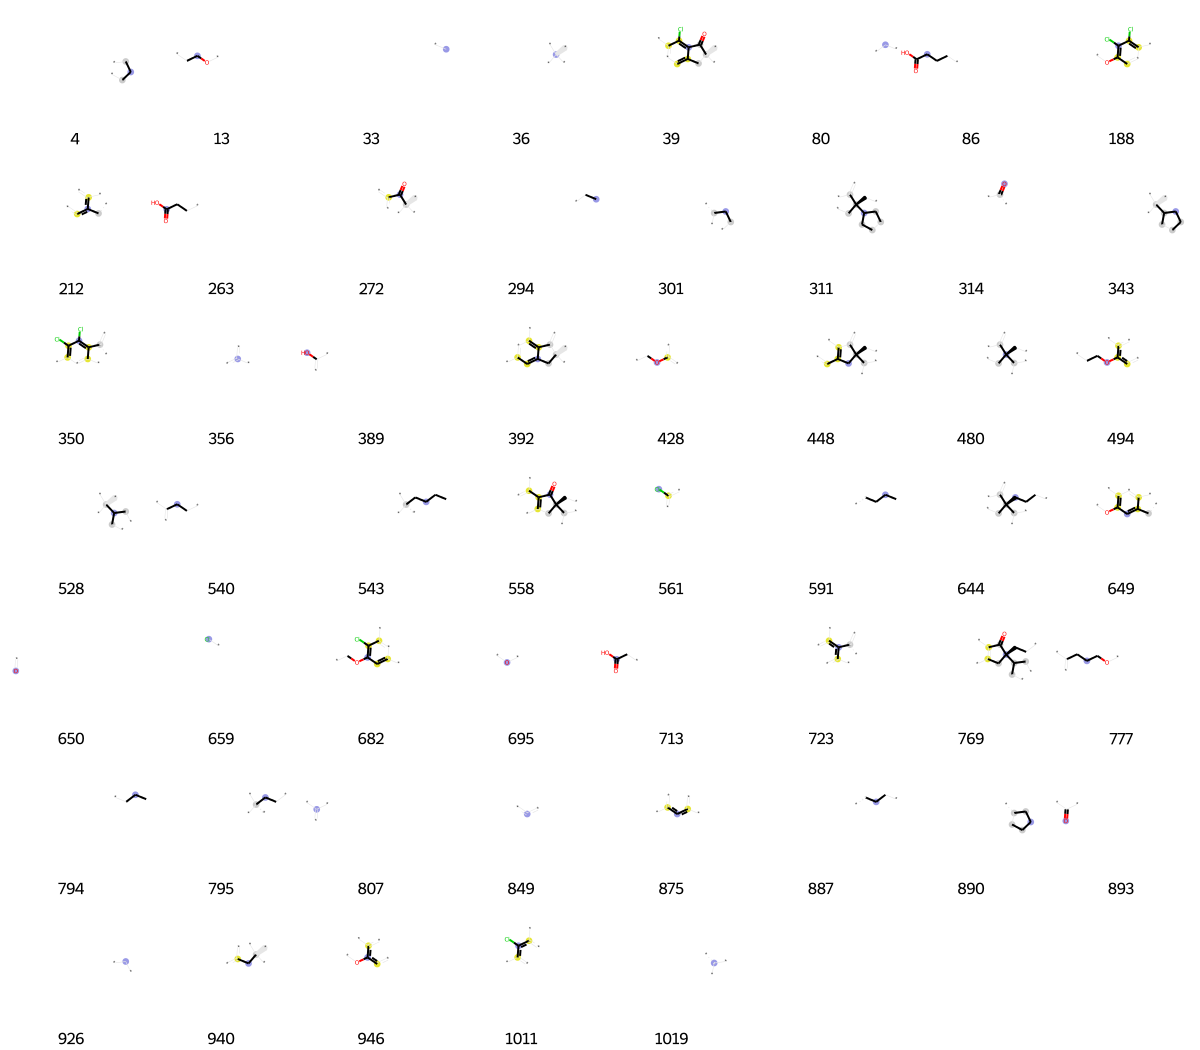

In [7572]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [7573]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[10,
 14,
 20,
 41,
 64,
 90,
 177,
 241,
 258,
 305,
 314,
 327,
 356,
 383,
 483,
 543,
 634,
 637,
 649,
 650,
 675,
 677,
 726,
 842,
 849,
 926,
 1019]

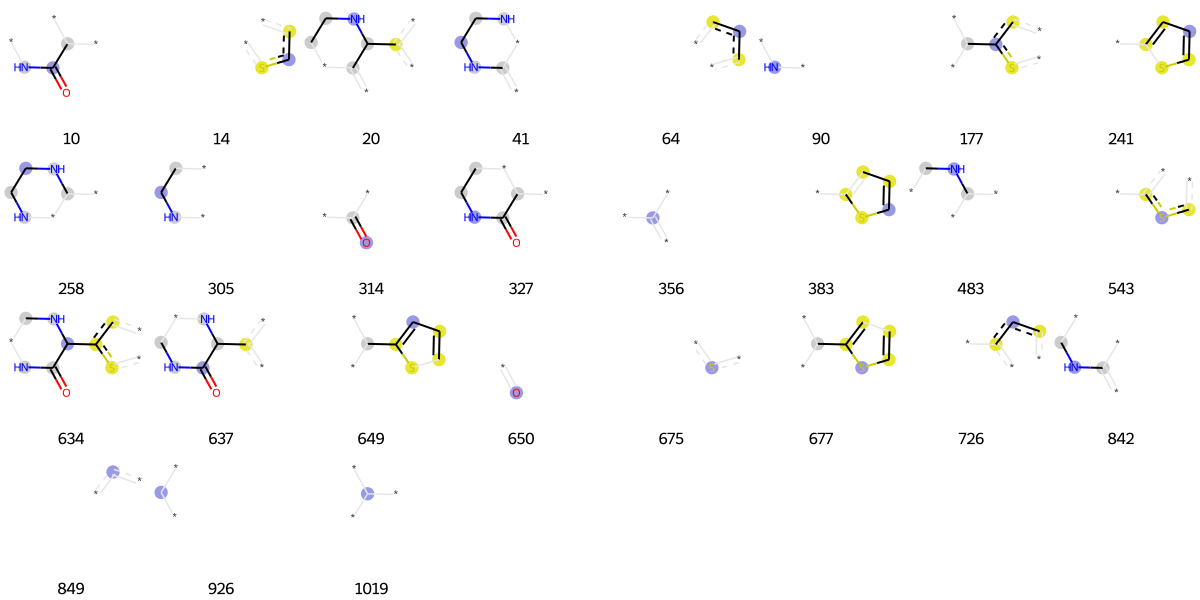

In [7574]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [7575]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 4,
 33,
 64,
 80,
 118,
 128,
 144,
 169,
 175,
 227,
 283,
 329,
 342,
 356,
 386,
 411,
 428,
 430,
 515,
 550,
 606,
 621,
 658,
 694,
 695,
 726,
 782,
 807,
 849,
 931,
 940,
 946,
 1006,
 1014]

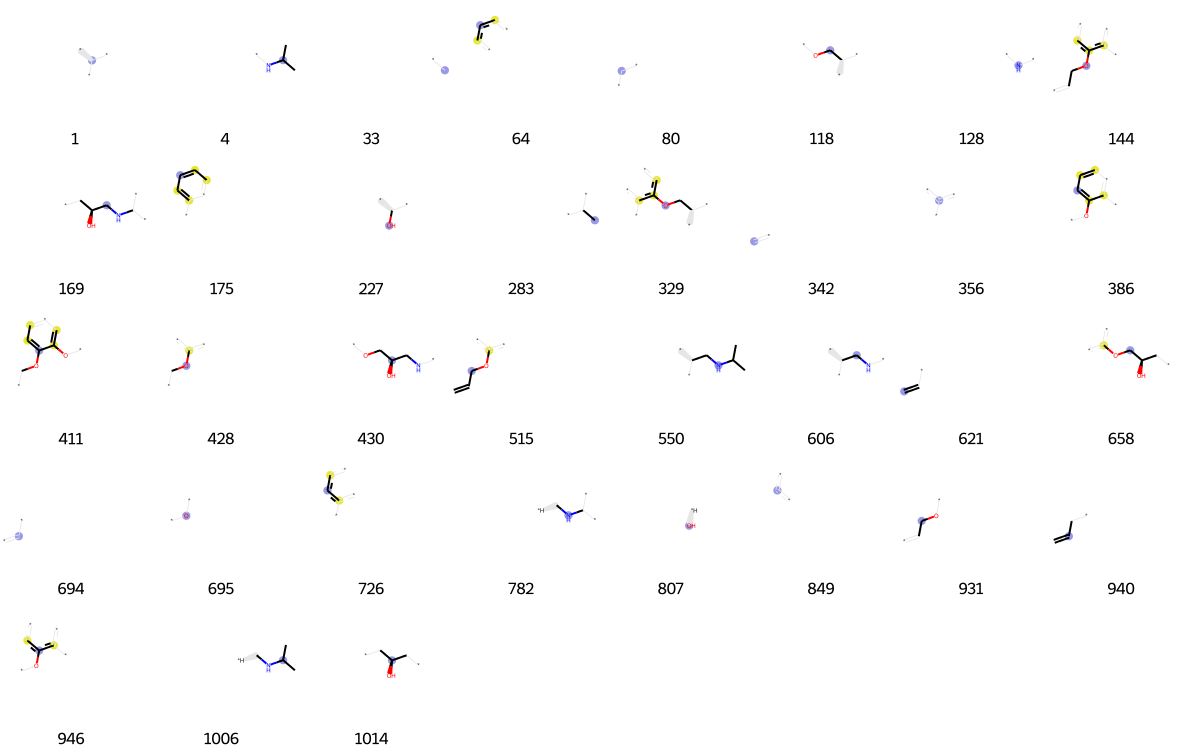

In [7576]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [7577]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[24,
 33,
 50,
 76,
 98,
 121,
 128,
 155,
 190,
 191,
 216,
 270,
 271,
 272,
 284,
 301,
 314,
 352,
 356,
 379,
 387,
 441,
 449,
 456,
 486,
 531,
 546,
 549,
 561,
 585,
 609,
 650,
 656,
 659,
 660,
 723,
 729,
 739,
 798,
 807,
 822,
 849,
 875,
 893,
 923,
 926,
 935,
 967,
 987,
 1019]

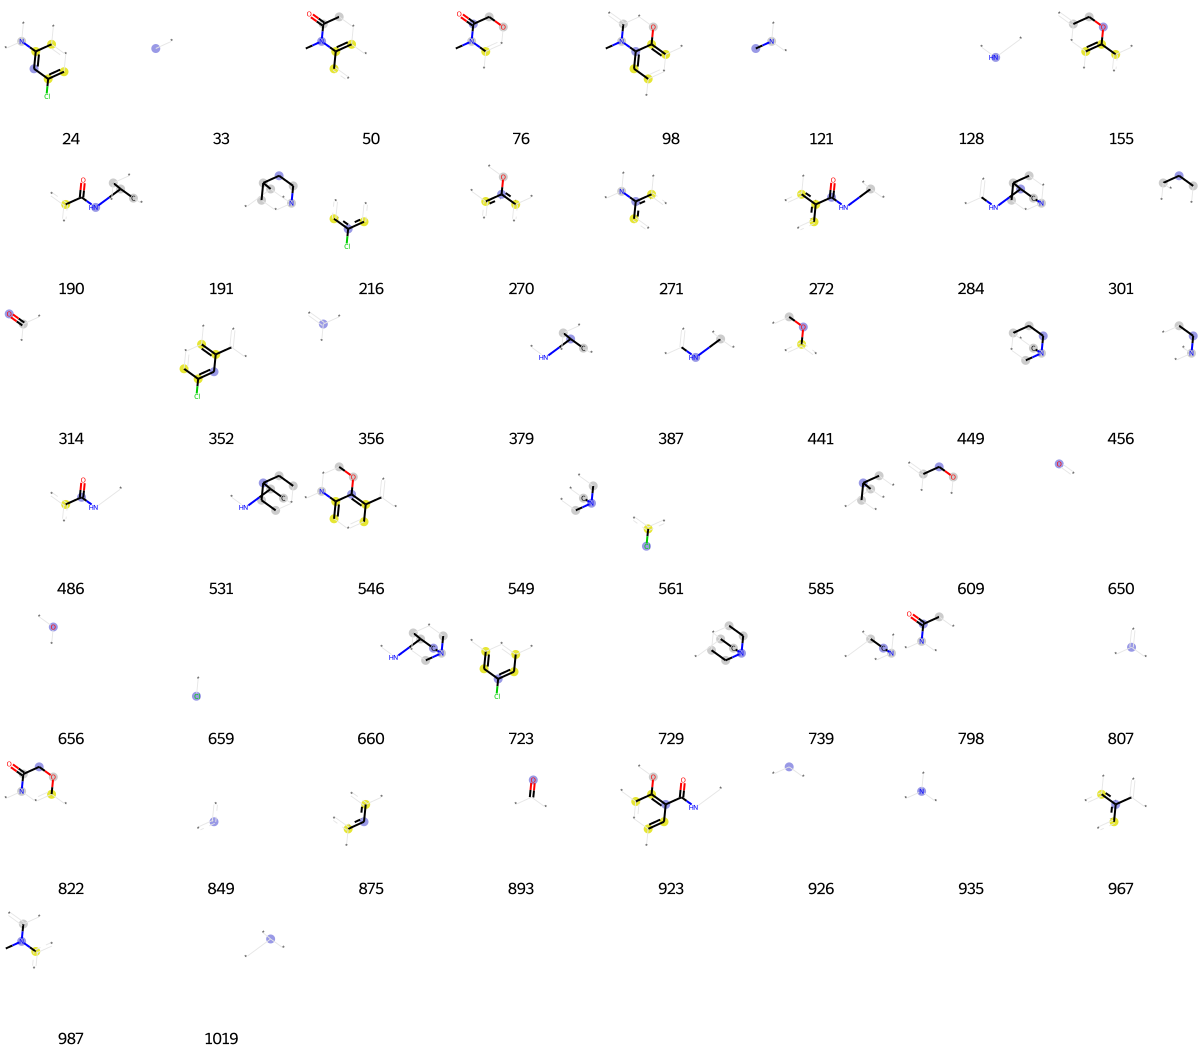

In [7578]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [7579]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[1,
 31,
 46,
 53,
 64,
 97,
 107,
 110,
 114,
 117,
 128,
 157,
 175,
 191,
 216,
 237,
 284,
 327,
 329,
 356,
 388,
 389,
 412,
 558,
 561,
 605,
 650,
 659,
 694,
 726,
 792,
 803,
 807,
 816,
 835,
 843,
 849,
 878,
 893,
 936,
 972,
 1009]

In [7580]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[15,
 33,
 35,
 36,
 64,
 78,
 130,
 139,
 140,
 147,
 196,
 233,
 246,
 276,
 314,
 317,
 342,
 352,
 356,
 373,
 409,
 429,
 433,
 447,
 463,
 472,
 508,
 514,
 545,
 571,
 572,
 578,
 583,
 600,
 606,
 611,
 650,
 655,
 673,
 677,
 685,
 723,
 726,
 747,
 807,
 809,
 824,
 849,
 881,
 893,
 976,
 984,
 996,
 1009,
 1019]

In [7581]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[1,
 33,
 41,
 64,
 80,
 102,
 119,
 147,
 175,
 221,
 222,
 268,
 278,
 341,
 356,
 380,
 381,
 389,
 396,
 434,
 449,
 482,
 557,
 558,
 575,
 577,
 601,
 650,
 656,
 658,
 670,
 695,
 715,
 721,
 726,
 774,
 803,
 807,
 849,
 893,
 897,
 926,
 1019]

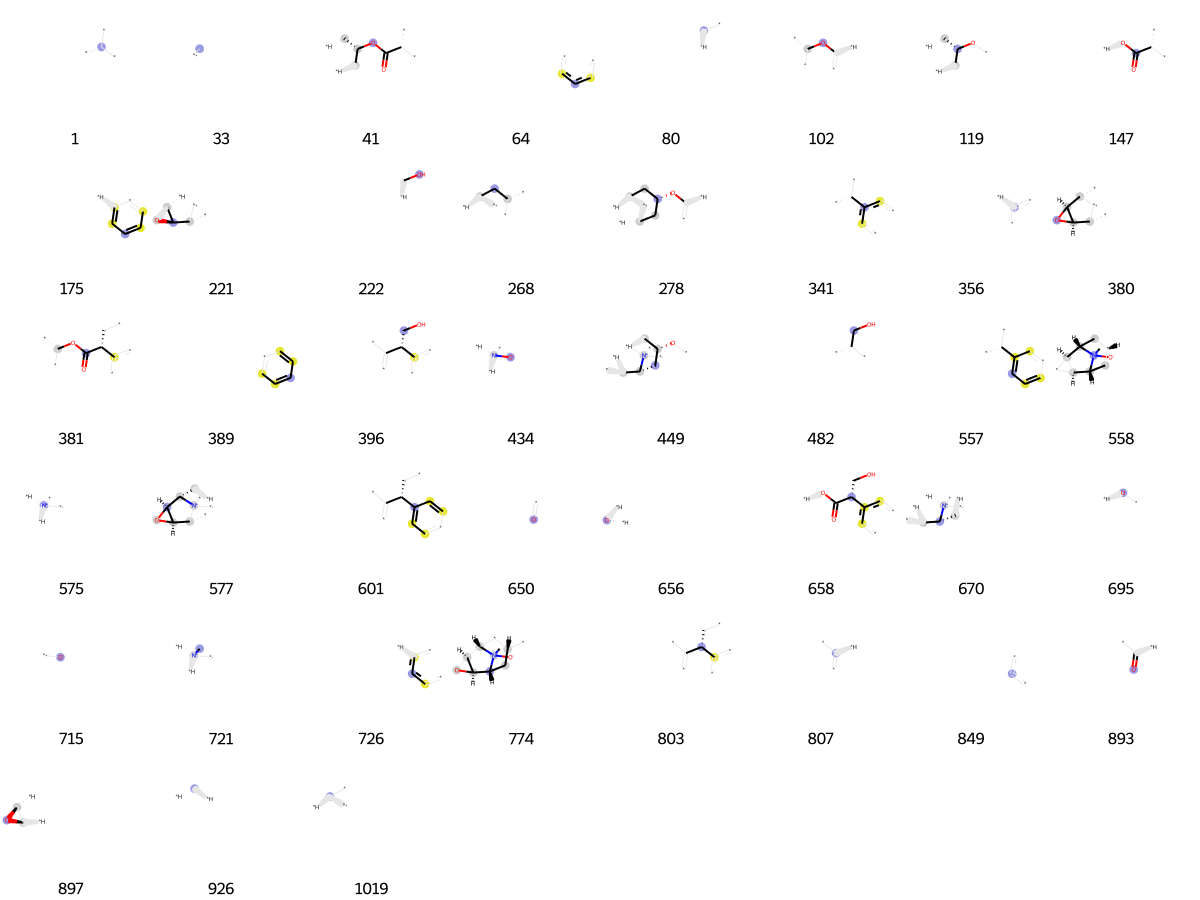

In [7582]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [7583]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[1,
 9,
 33,
 64,
 80,
 83,
 104,
 128,
 163,
 175,
 220,
 266,
 283,
 284,
 294,
 305,
 314,
 326,
 333,
 350,
 356,
 361,
 368,
 444,
 456,
 502,
 549,
 580,
 599,
 633,
 650,
 656,
 702,
 714,
 726,
 736,
 767,
 782,
 784,
 849,
 898,
 922,
 926,
 935,
 994]

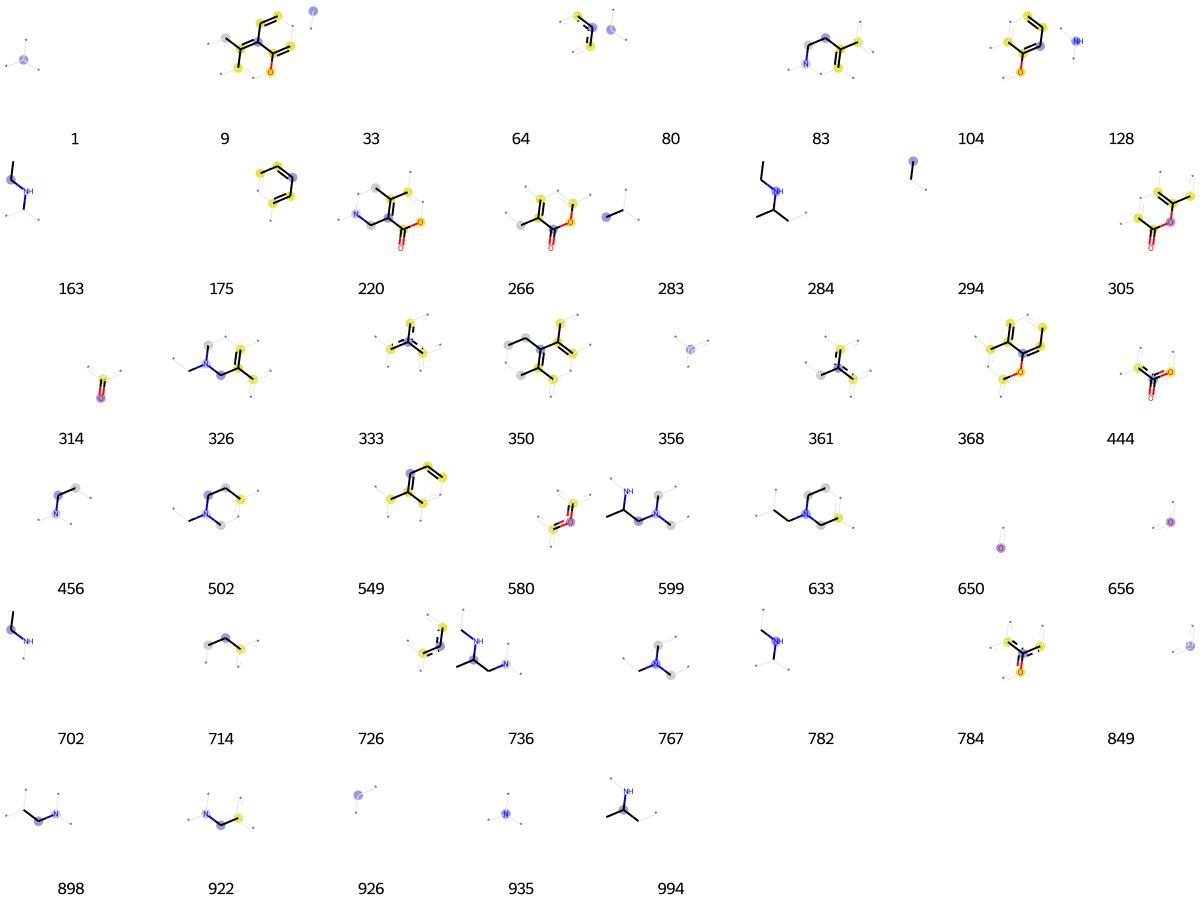

In [7584]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [7585]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 33,
 64,
 80,
 128,
 175,
 199,
 200,
 273,
 283,
 294,
 356,
 367,
 514,
 573,
 650,
 658,
 667,
 672,
 698,
 726,
 782,
 792,
 794,
 807,
 814,
 837,
 849,
 868,
 893,
 954,
 975,
 989,
 992]

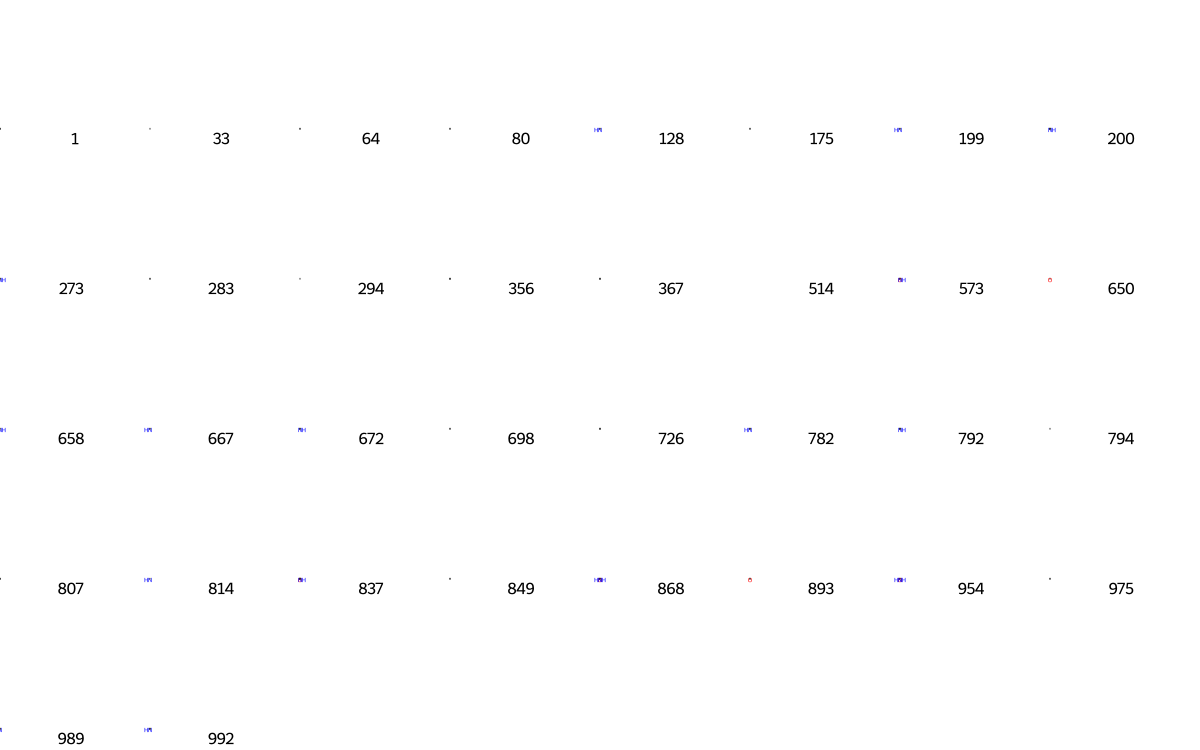

In [7586]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [7587]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[33,
 46,
 64,
 75,
 78,
 121,
 128,
 131,
 175,
 207,
 288,
 315,
 352,
 356,
 365,
 378,
 381,
 404,
 410,
 428,
 448,
 469,
 470,
 486,
 511,
 578,
 588,
 650,
 726,
 792,
 807,
 840,
 842,
 849,
 893,
 924,
 935,
 984,
 987,
 990,
 993]

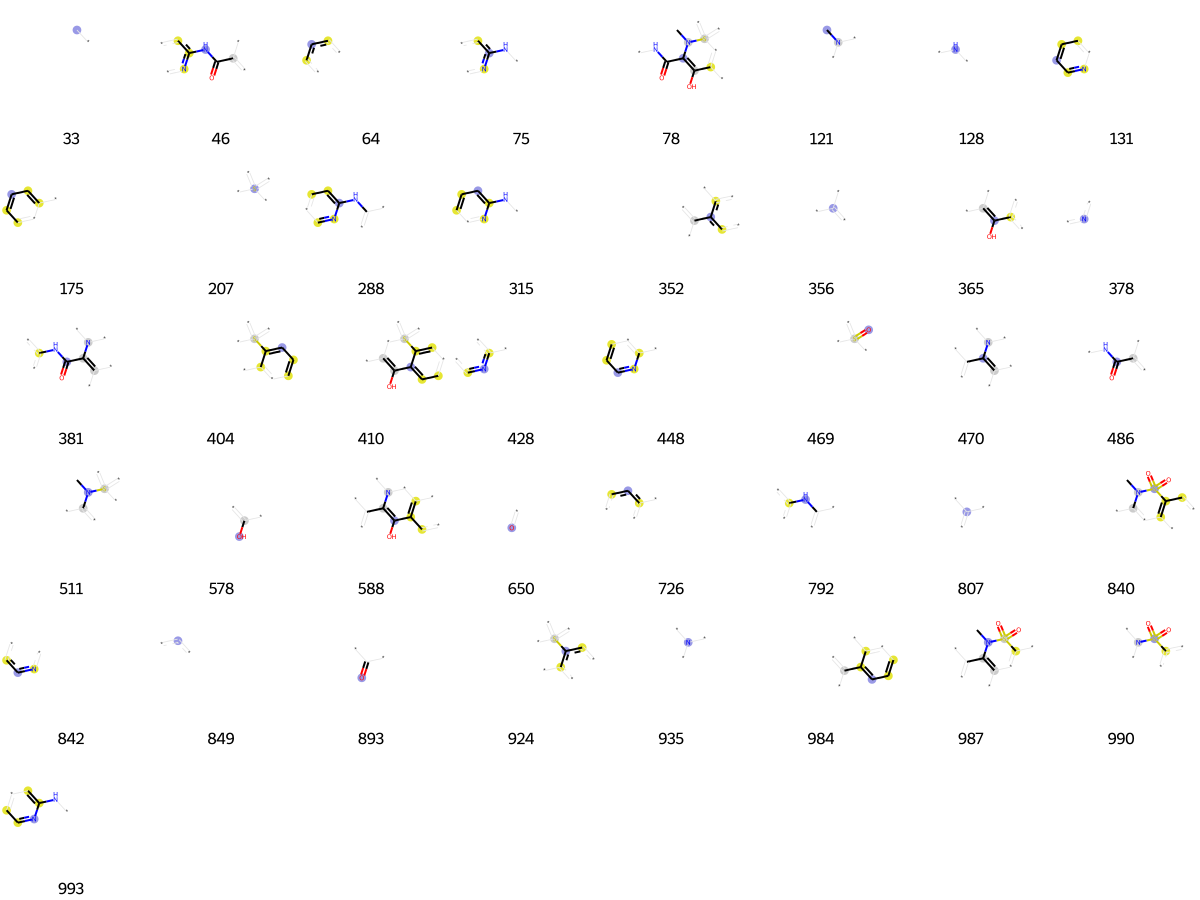

In [7588]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [7589]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[14,
 23,
 33,
 53,
 61,
 63,
 128,
 198,
 227,
 294,
 314,
 333,
 343,
 356,
 368,
 378,
 379,
 389,
 406,
 407,
 410,
 428,
 453,
 456,
 464,
 514,
 525,
 527,
 543,
 554,
 559,
 564,
 571,
 577,
 621,
 635,
 642,
 650,
 672,
 675,
 695,
 705,
 709,
 726,
 739,
 798,
 807,
 831,
 841,
 842,
 849,
 887,
 893,
 905,
 926,
 935,
 937,
 958,
 967,
 1019]

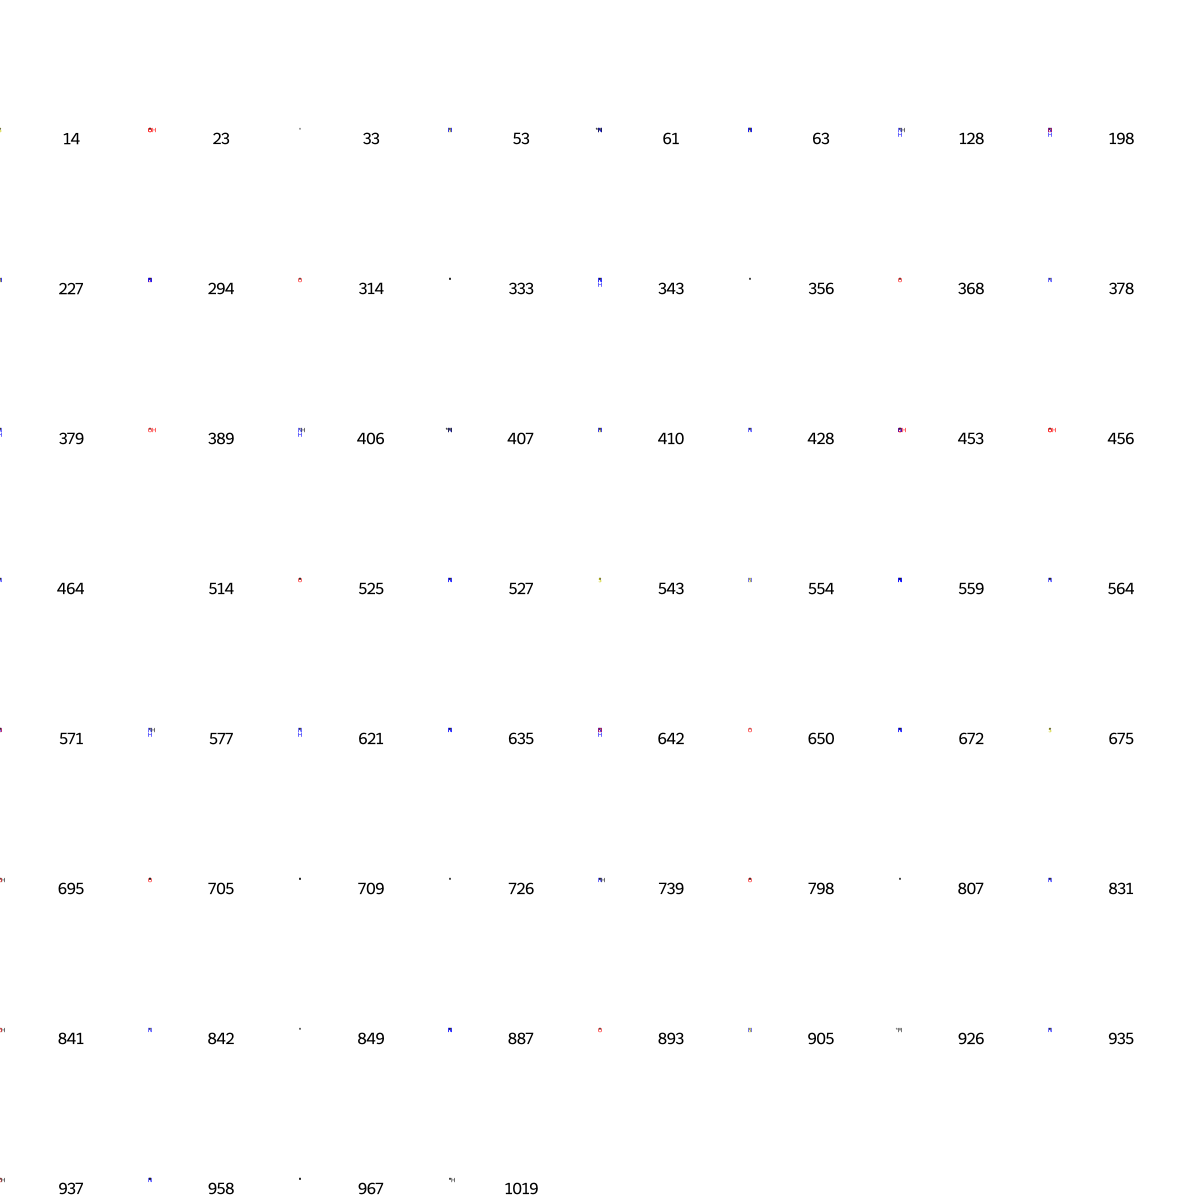

In [7590]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [7591]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[15,
 56,
 64,
 73,
 74,
 90,
 114,
 128,
 133,
 140,
 184,
 186,
 191,
 200,
 236,
 270,
 274,
 289,
 293,
 352,
 356,
 378,
 393,
 429,
 498,
 573,
 585,
 607,
 650,
 703,
 726,
 728,
 766,
 792,
 807,
 809,
 832,
 841,
 849,
 873,
 875,
 893,
 904,
 909,
 922,
 929,
 965,
 966,
 990,
 993]

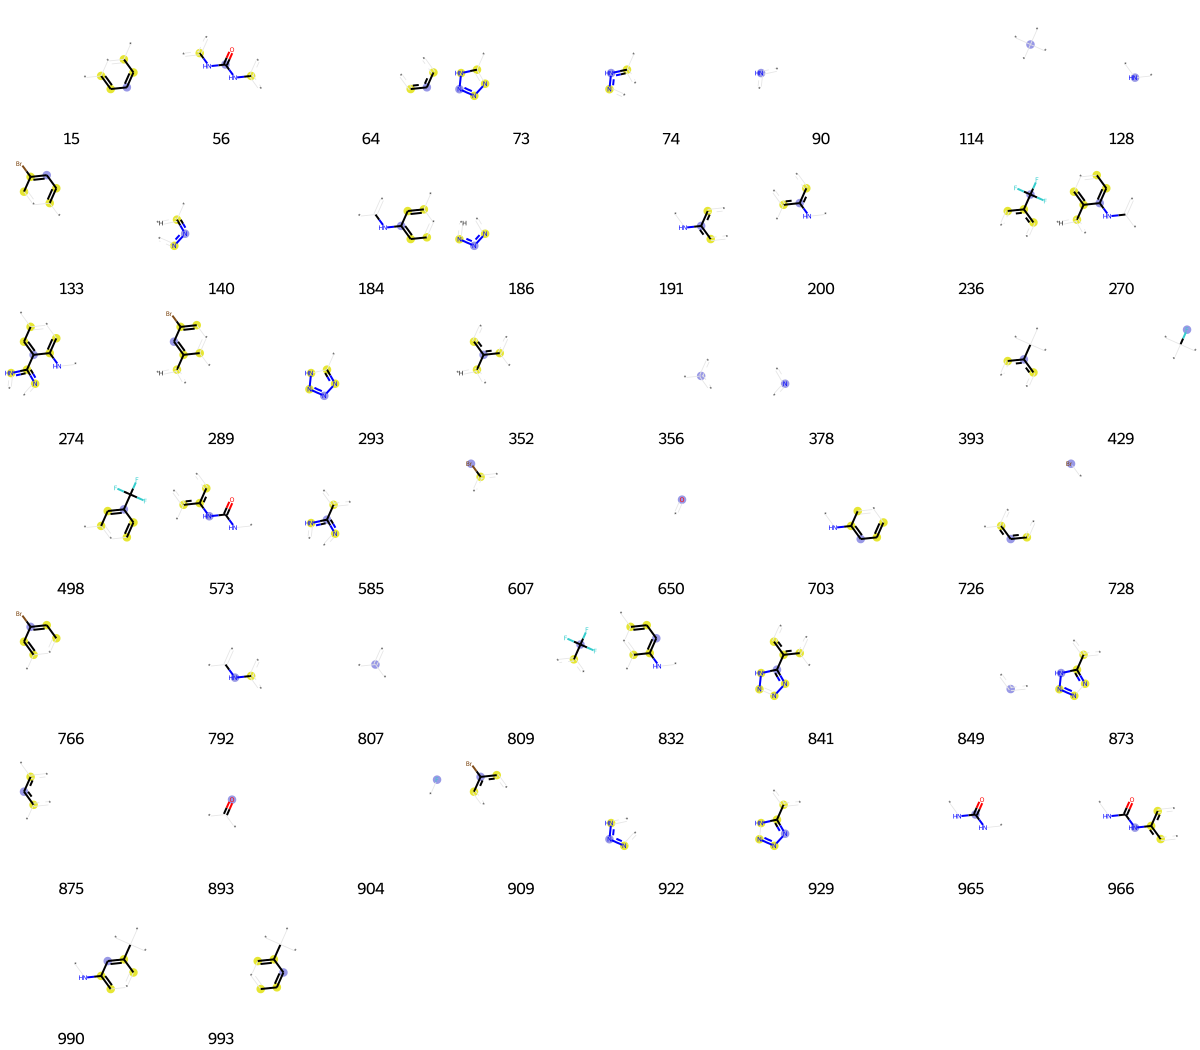

In [7592]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [7593]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 29,
 33,
 41,
 64,
 80,
 102,
 119,
 147,
 175,
 221,
 222,
 268,
 278,
 301,
 341,
 356,
 380,
 381,
 389,
 396,
 449,
 471,
 482,
 557,
 575,
 577,
 601,
 628,
 647,
 650,
 656,
 658,
 670,
 695,
 721,
 726,
 745,
 785,
 803,
 807,
 849,
 884,
 893,
 897,
 918,
 926,
 1019]

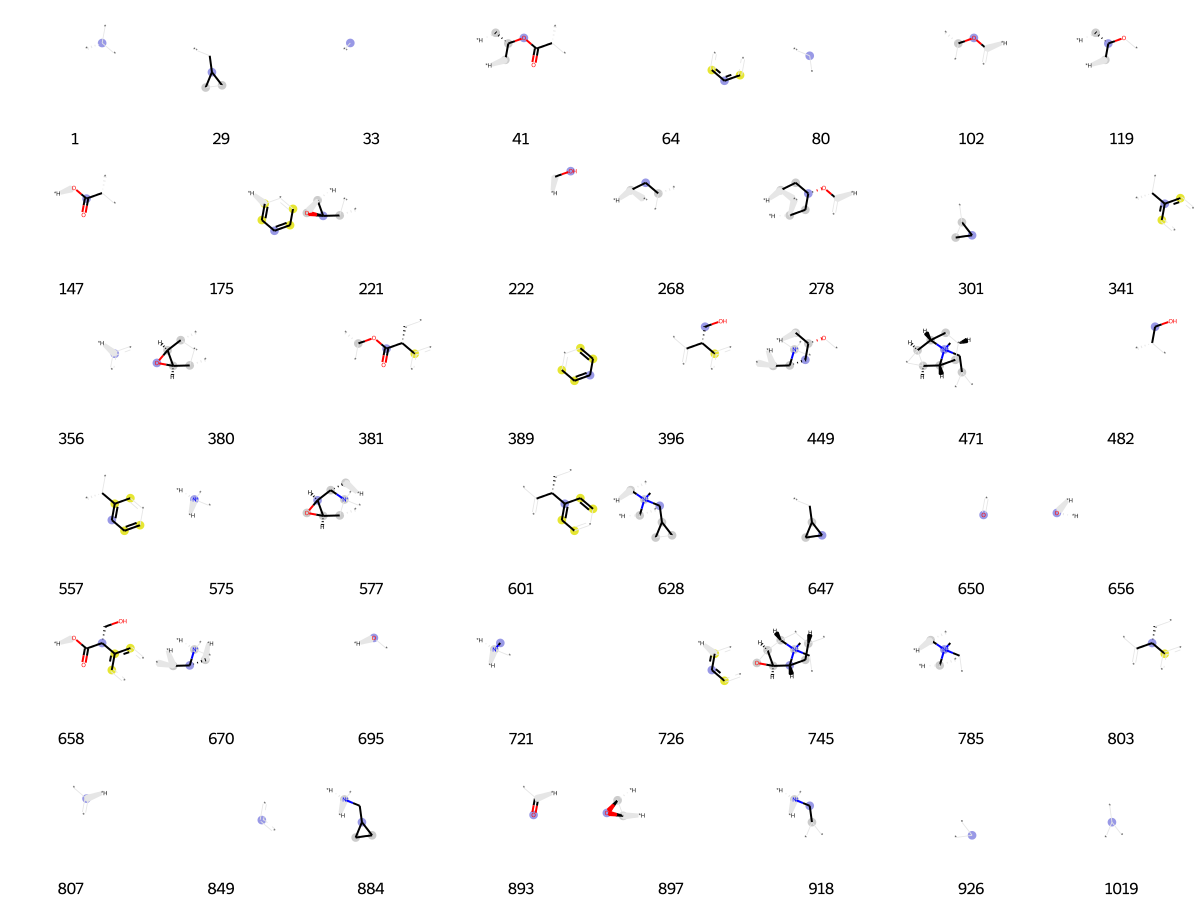

In [7594]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [7595]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 9,
 36,
 75,
 80,
 90,
 114,
 121,
 130,
 132,
 138,
 216,
 256,
 262,
 305,
 341,
 356,
 366,
 386,
 389,
 408,
 419,
 429,
 456,
 458,
 484,
 520,
 548,
 556,
 561,
 645,
 646,
 653,
 659,
 666,
 699,
 726,
 739,
 767,
 807,
 809,
 829,
 849,
 875,
 887,
 890,
 904,
 926,
 935,
 953]

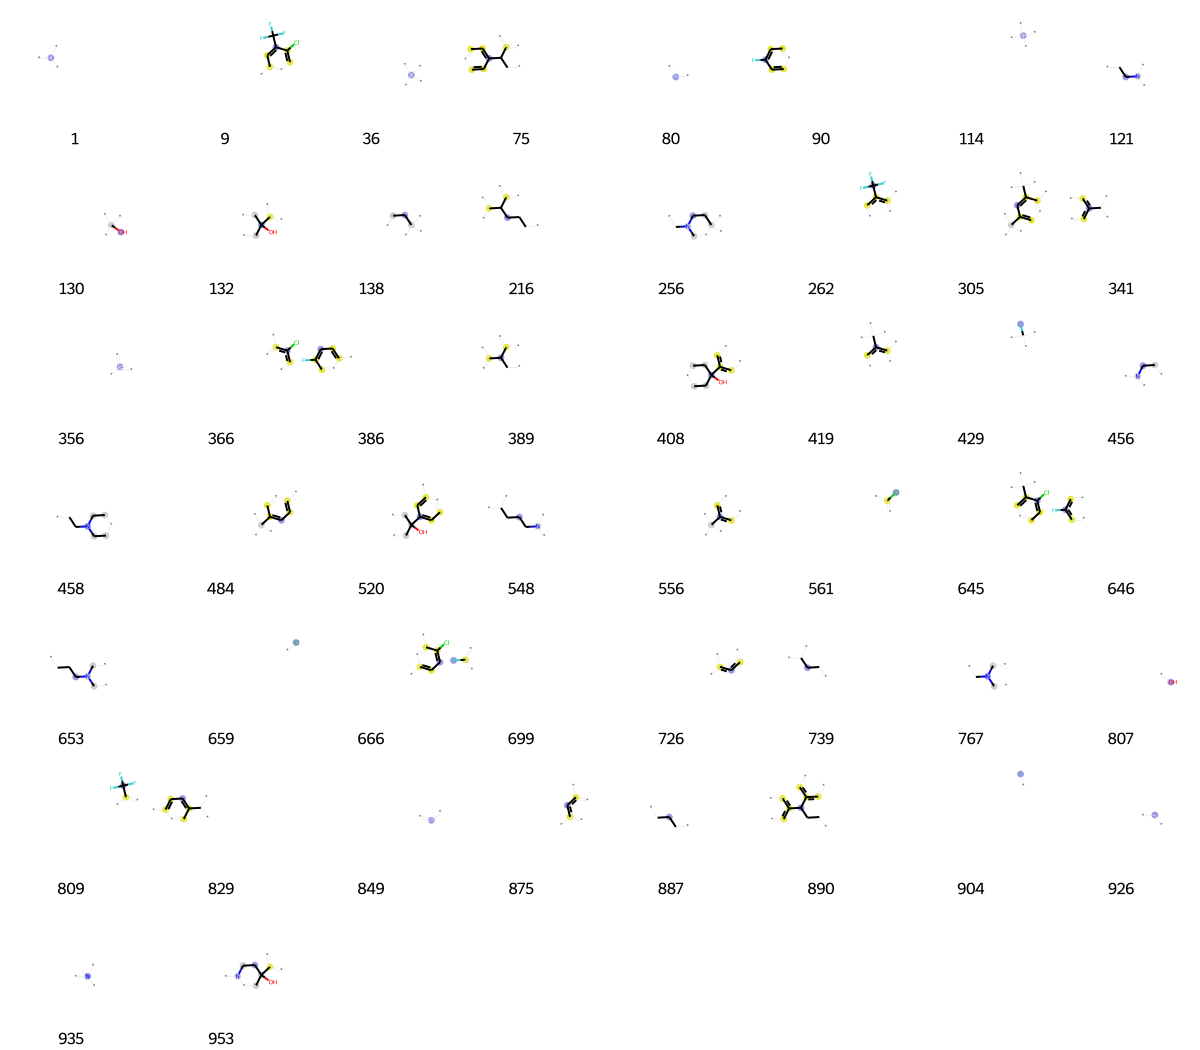

In [7596]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [7597]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[15,
 33,
 43,
 64,
 65,
 81,
 105,
 114,
 121,
 130,
 136,
 166,
 221,
 267,
 278,
 333,
 353,
 356,
 361,
 378,
 381,
 407,
 417,
 448,
 456,
 511,
 523,
 552,
 569,
 578,
 629,
 656,
 672,
 726,
 736,
 745,
 804,
 807,
 831,
 849,
 875,
 926,
 935,
 950,
 1014]

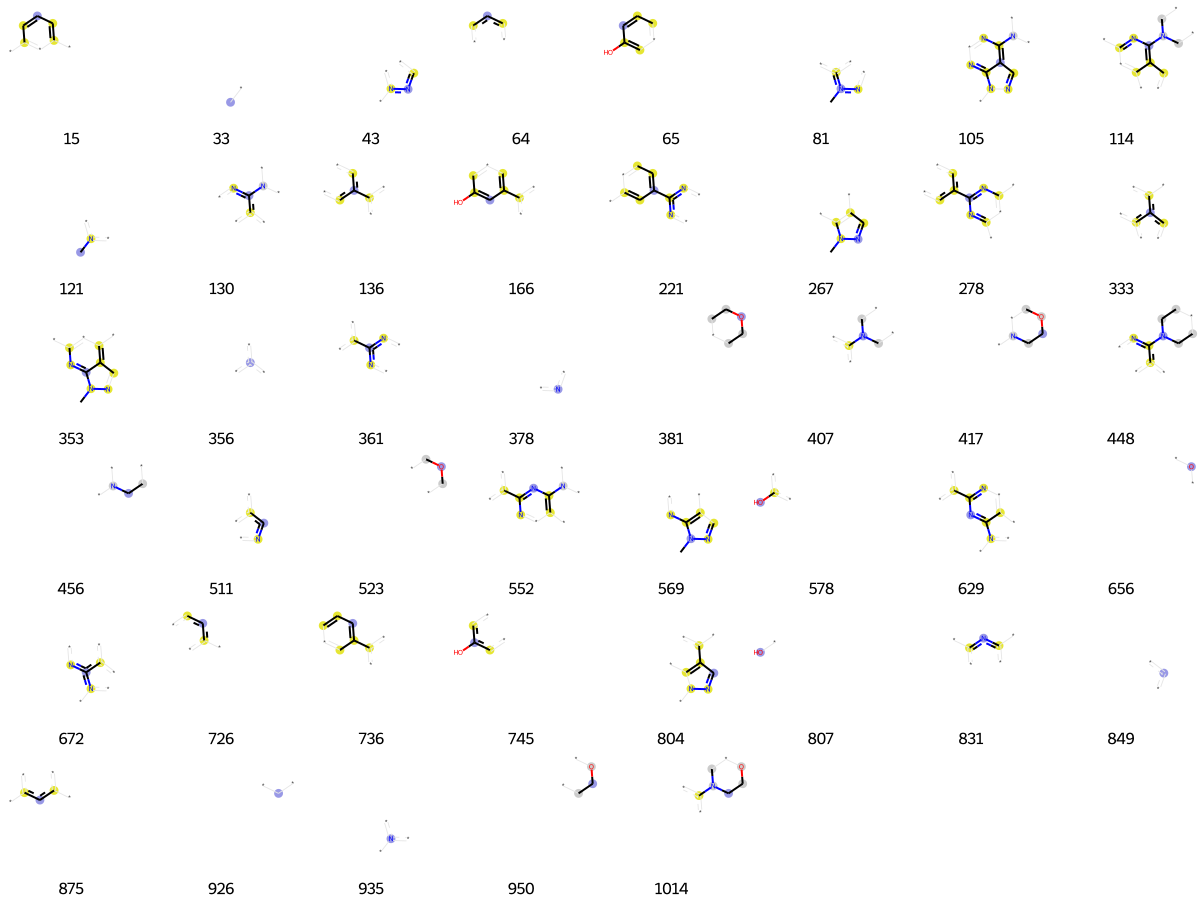

In [7598]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [7599]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[4,
 15,
 22,
 64,
 90,
 128,
 147,
 173,
 179,
 200,
 246,
 319,
 333,
 350,
 356,
 366,
 392,
 417,
 452,
 465,
 502,
 506,
 549,
 561,
 583,
 650,
 659,
 672,
 715,
 726,
 766,
 806,
 833,
 849,
 855,
 883,
 972]

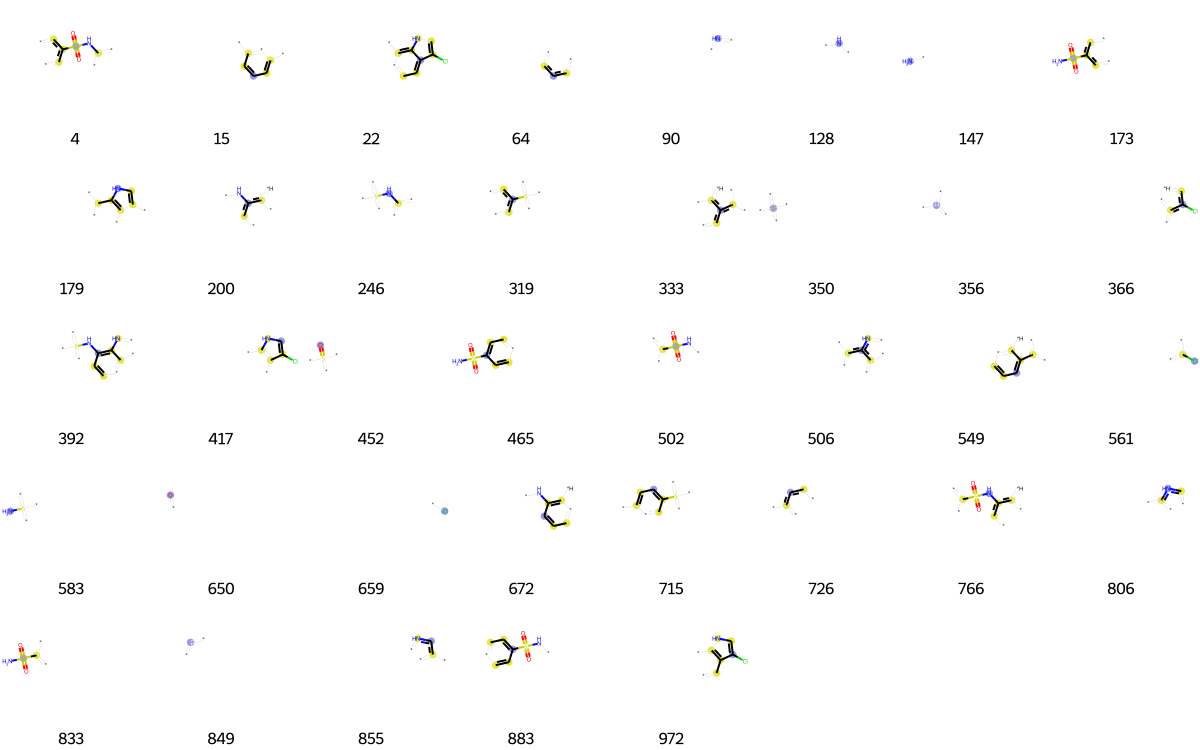

In [7600]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [7601]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 15,
 22,
 33,
 46,
 64,
 79,
 80,
 102,
 112,
 113,
 114,
 117,
 128,
 183,
 190,
 214,
 216,
 223,
 236,
 283,
 305,
 310,
 311,
 320,
 341,
 348,
 356,
 360,
 378,
 392,
 393,
 428,
 429,
 476,
 494,
 511,
 546,
 548,
 557,
 561,
 610,
 622,
 641,
 650,
 658,
 659,
 674,
 680,
 695,
 710,
 712,
 726,
 730,
 790,
 807,
 809,
 816,
 849,
 857,
 875,
 879,
 893,
 904,
 951,
 997]

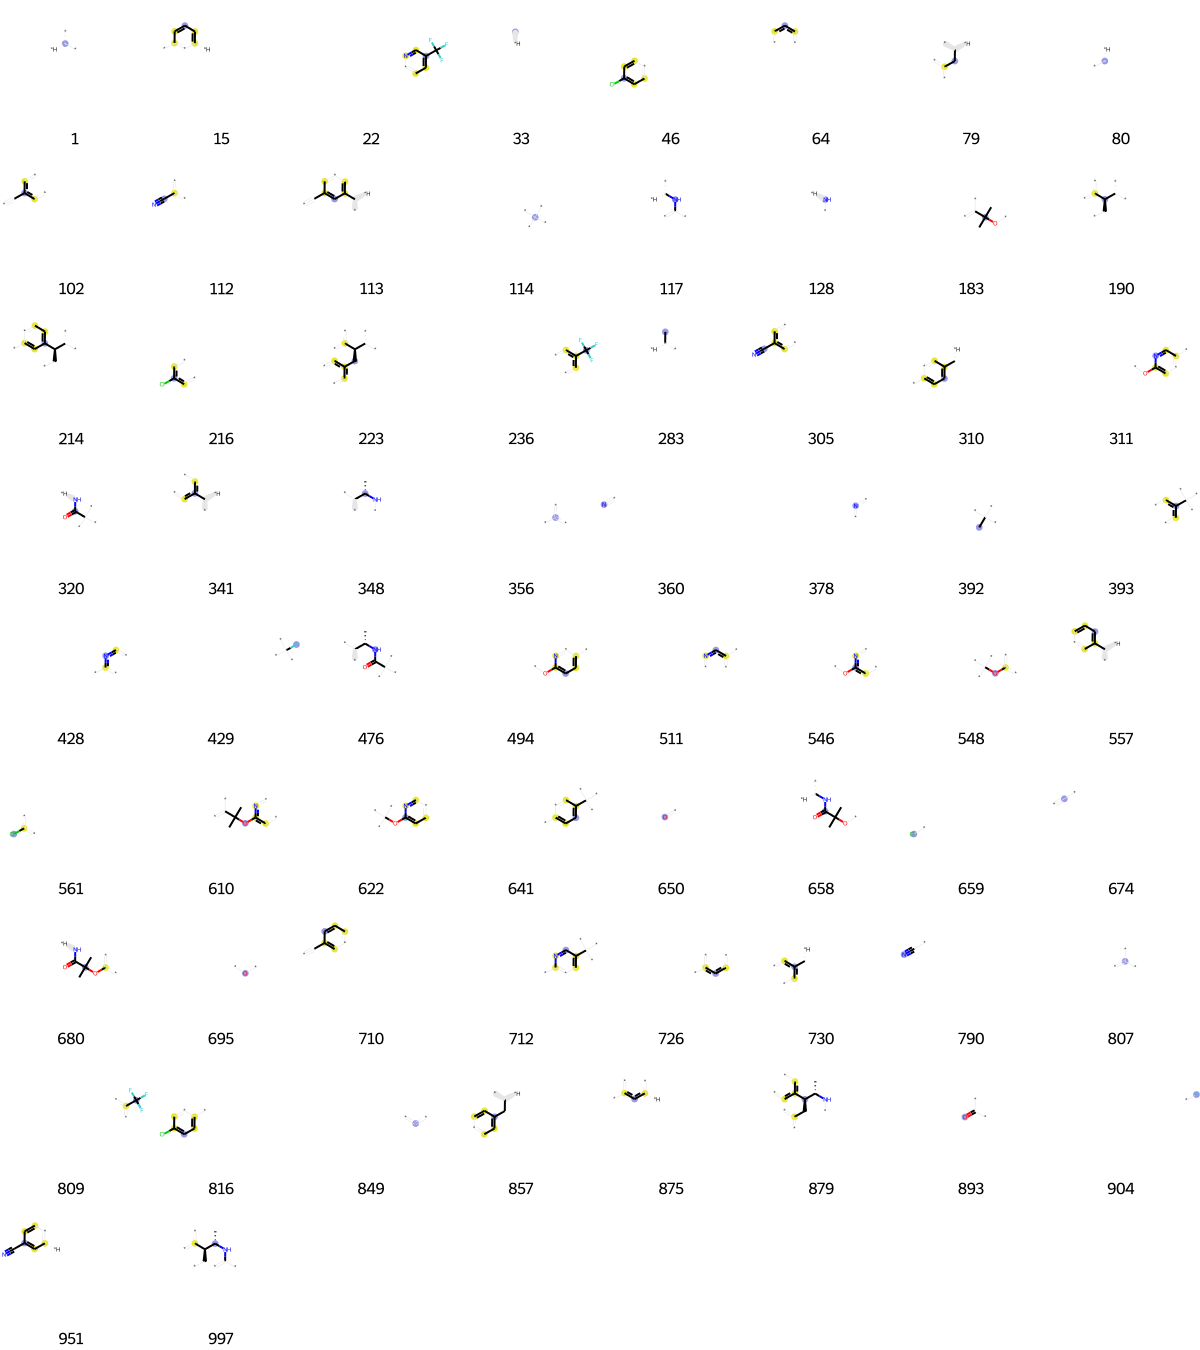

In [7602]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [7603]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[0,
 1,
 4,
 7,
 14,
 33,
 36,
 43,
 49,
 51,
 75,
 81,
 91,
 118,
 130,
 160,
 165,
 169,
 184,
 202,
 212,
 227,
 231,
 233,
 242,
 250,
 252,
 260,
 261,
 268,
 276,
 279,
 283,
 285,
 300,
 314,
 319,
 327,
 340,
 356,
 357,
 387,
 396,
 403,
 407,
 463,
 485,
 524,
 532,
 550,
 578,
 595,
 623,
 646,
 650,
 652,
 656,
 669,
 679,
 687,
 695,
 698,
 702,
 710,
 722,
 723,
 798,
 800,
 803,
 807,
 831,
 841,
 849,
 875,
 893,
 897,
 926,
 946,
 960,
 964,
 967,
 1019]

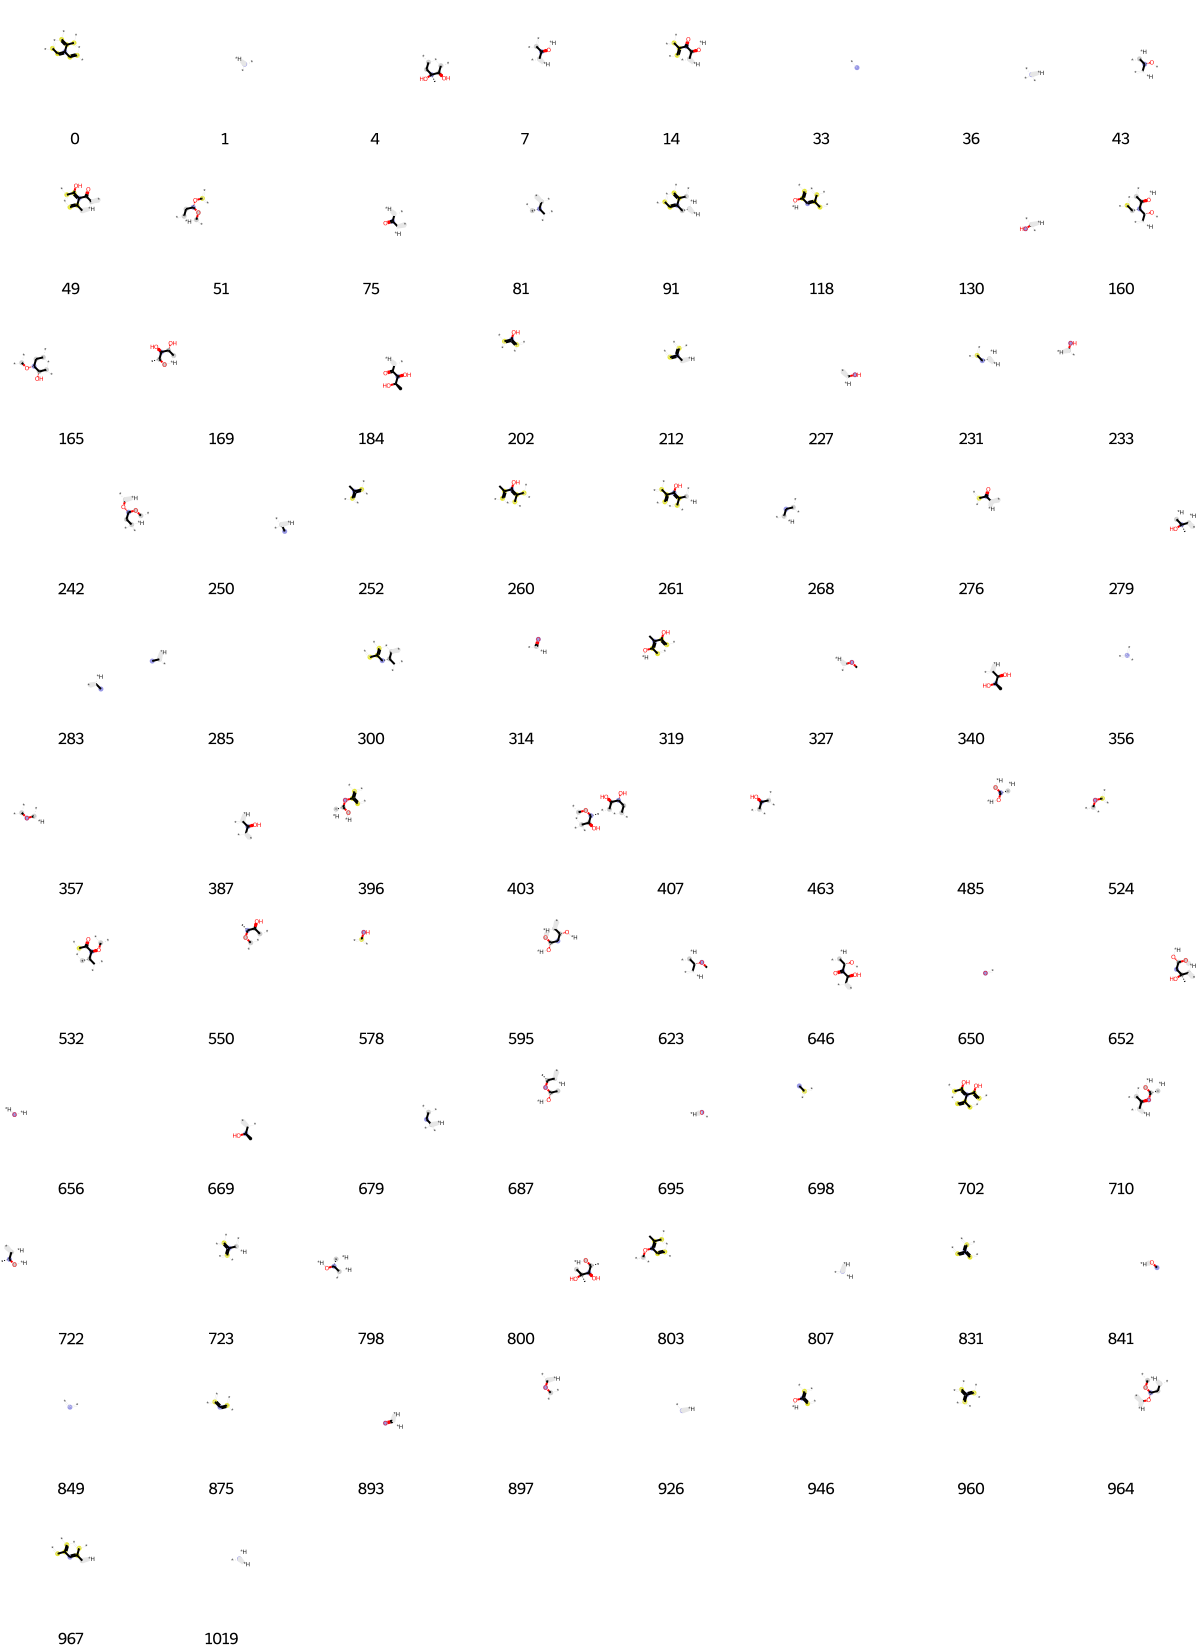

In [7604]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [7605]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[1,
 33,
 64,
 104,
 112,
 114,
 116,
 175,
 184,
 194,
 215,
 230,
 279,
 333,
 352,
 356,
 360,
 361,
 378,
 389,
 392,
 427,
 511,
 549,
 562,
 579,
 650,
 674,
 680,
 694,
 701,
 711,
 713,
 726,
 727,
 774,
 790,
 807,
 838,
 842,
 849,
 893,
 907,
 953]

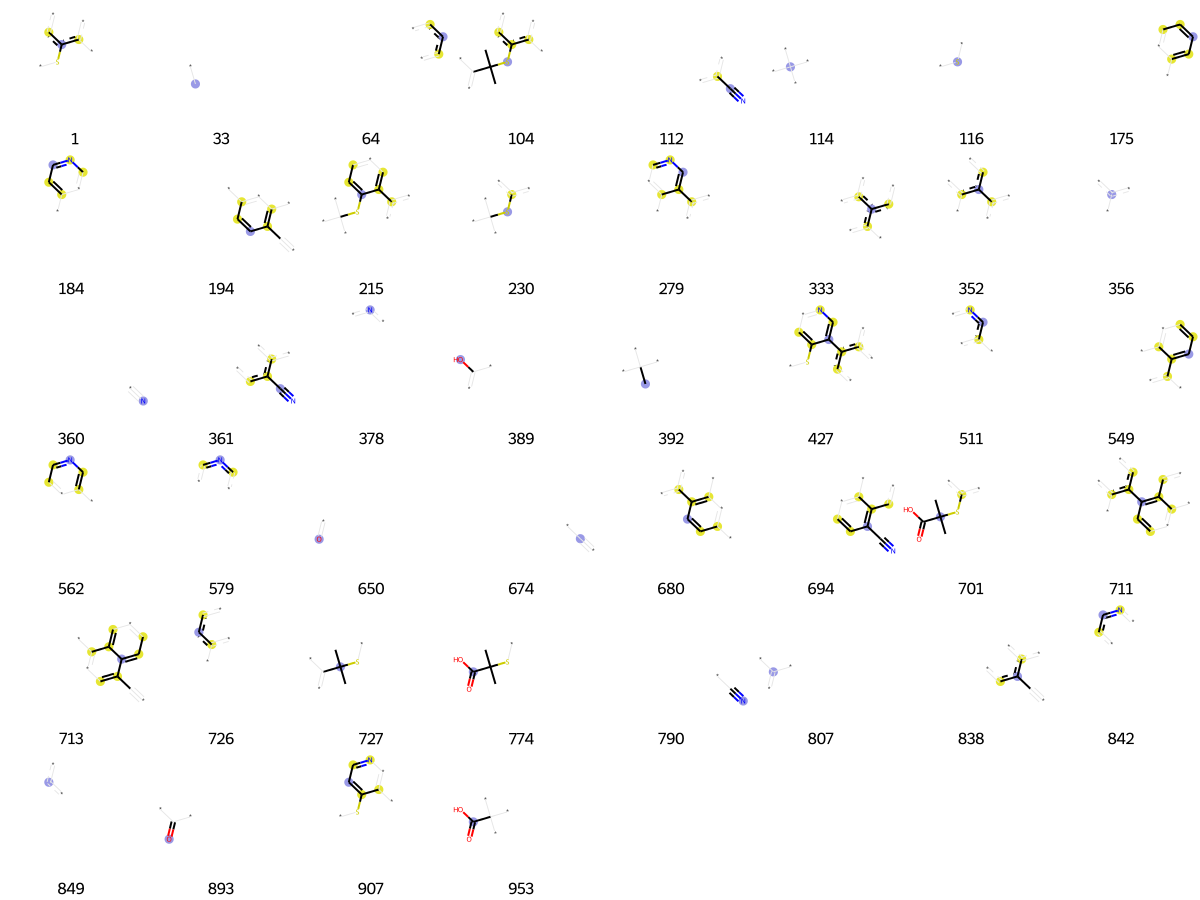

In [7606]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [7607]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[33,
 36,
 72,
 75,
 84,
 130,
 138,
 139,
 141,
 162,
 208,
 216,
 242,
 249,
 250,
 253,
 255,
 280,
 286,
 296,
 301,
 314,
 342,
 351,
 355,
 356,
 362,
 364,
 412,
 455,
 519,
 529,
 530,
 531,
 621,
 650,
 654,
 671,
 674,
 676,
 679,
 690,
 709,
 714,
 726,
 737,
 779,
 807,
 815,
 841,
 849,
 881,
 888,
 926,
 949,
 960,
 973,
 1003,
 1019]

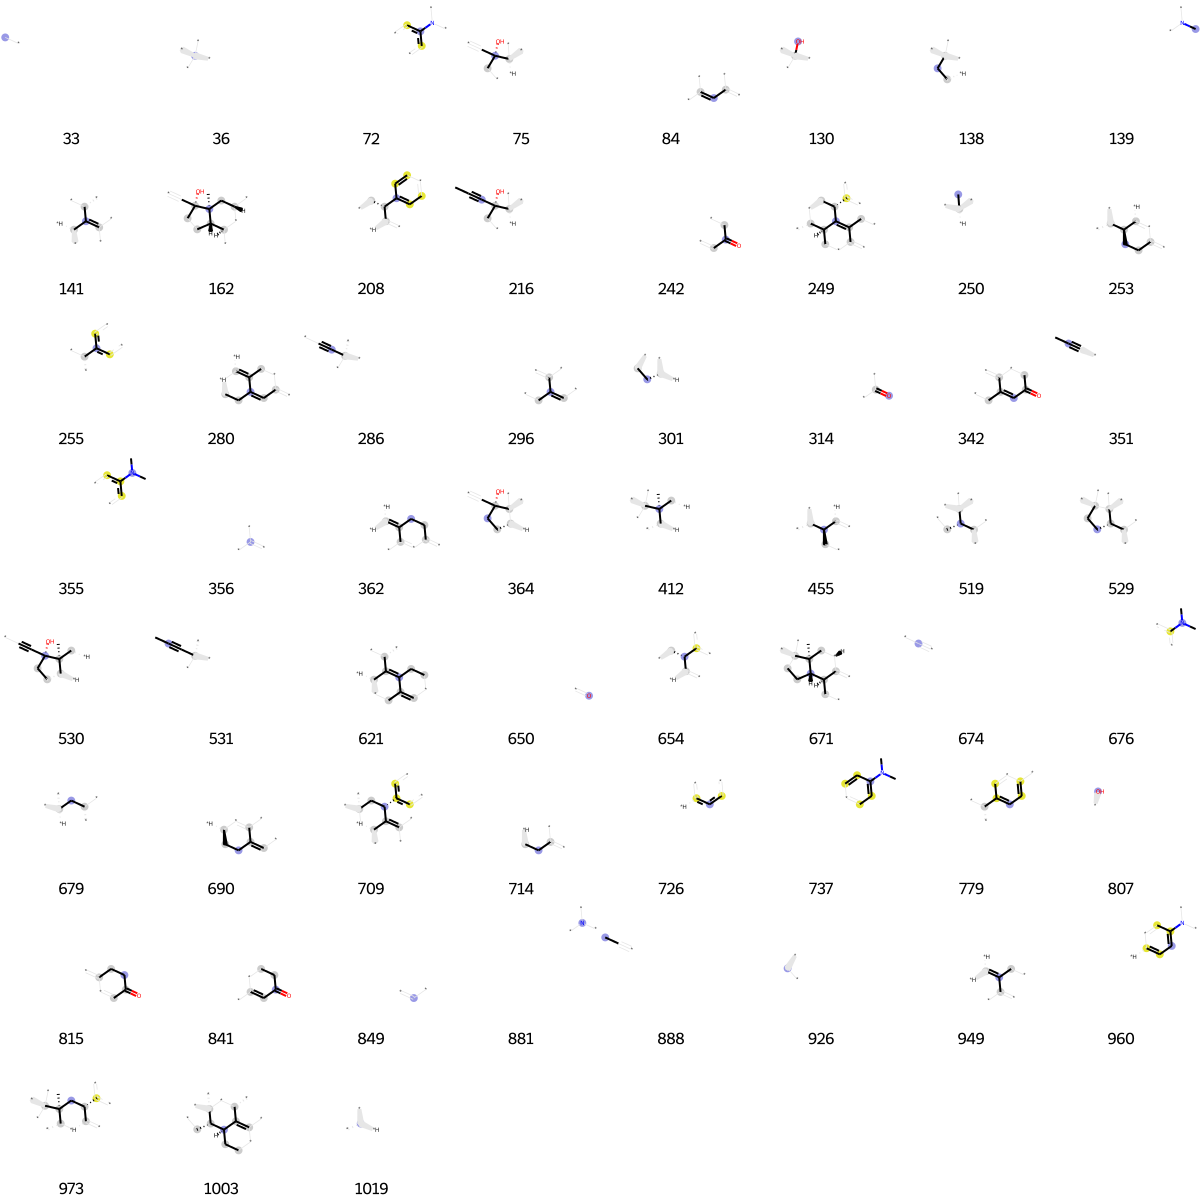

In [7608]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [7609]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 6,
 71,
 80,
 106,
 125,
 147,
 150,
 216,
 222,
 289,
 316,
 351,
 356,
 378,
 409,
 428,
 431,
 433,
 460,
 482,
 560,
 578,
 672,
 686,
 695,
 696,
 700,
 807,
 816,
 831,
 849,
 852,
 867,
 932,
 935,
 1000]

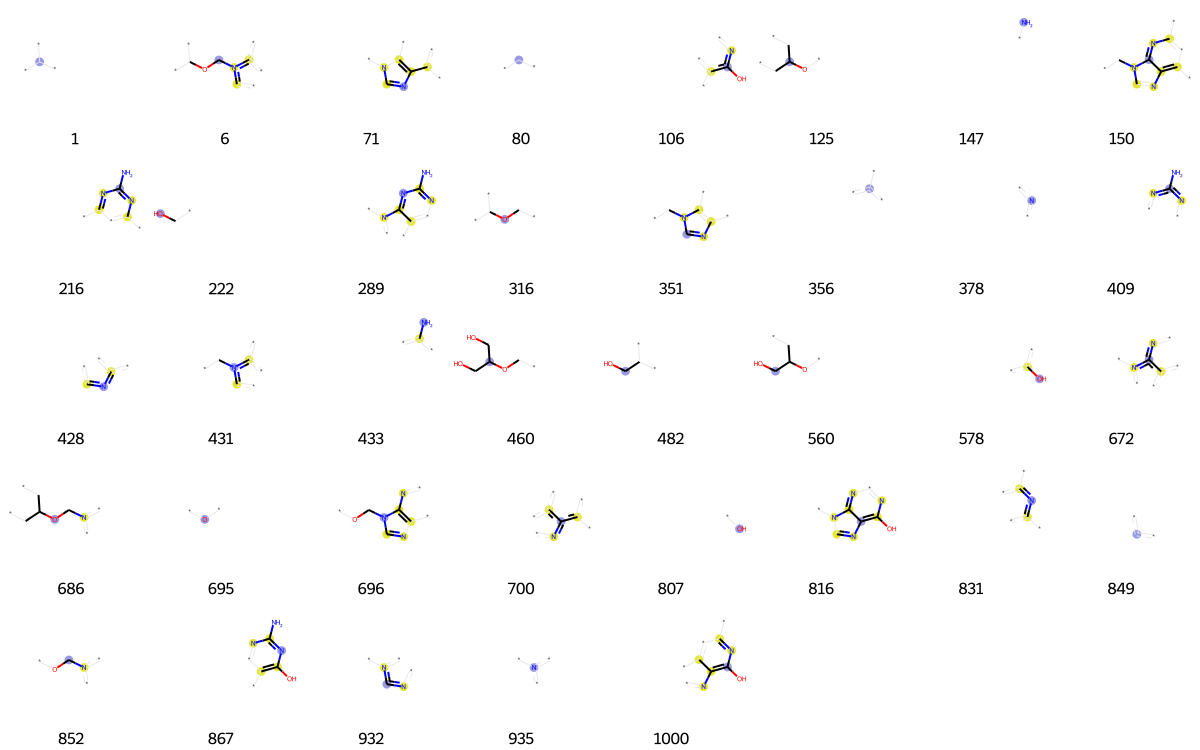

In [7610]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [7611]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[31,
 33,
 36,
 79,
 84,
 86,
 93,
 138,
 184,
 233,
 250,
 267,
 301,
 314,
 356,
 389,
 412,
 414,
 418,
 423,
 425,
 435,
 453,
 470,
 478,
 516,
 549,
 555,
 558,
 559,
 610,
 650,
 679,
 759,
 760,
 781,
 788,
 807,
 829,
 846,
 849,
 855,
 857,
 872,
 893,
 904,
 926,
 927,
 992,
 999,
 1019]

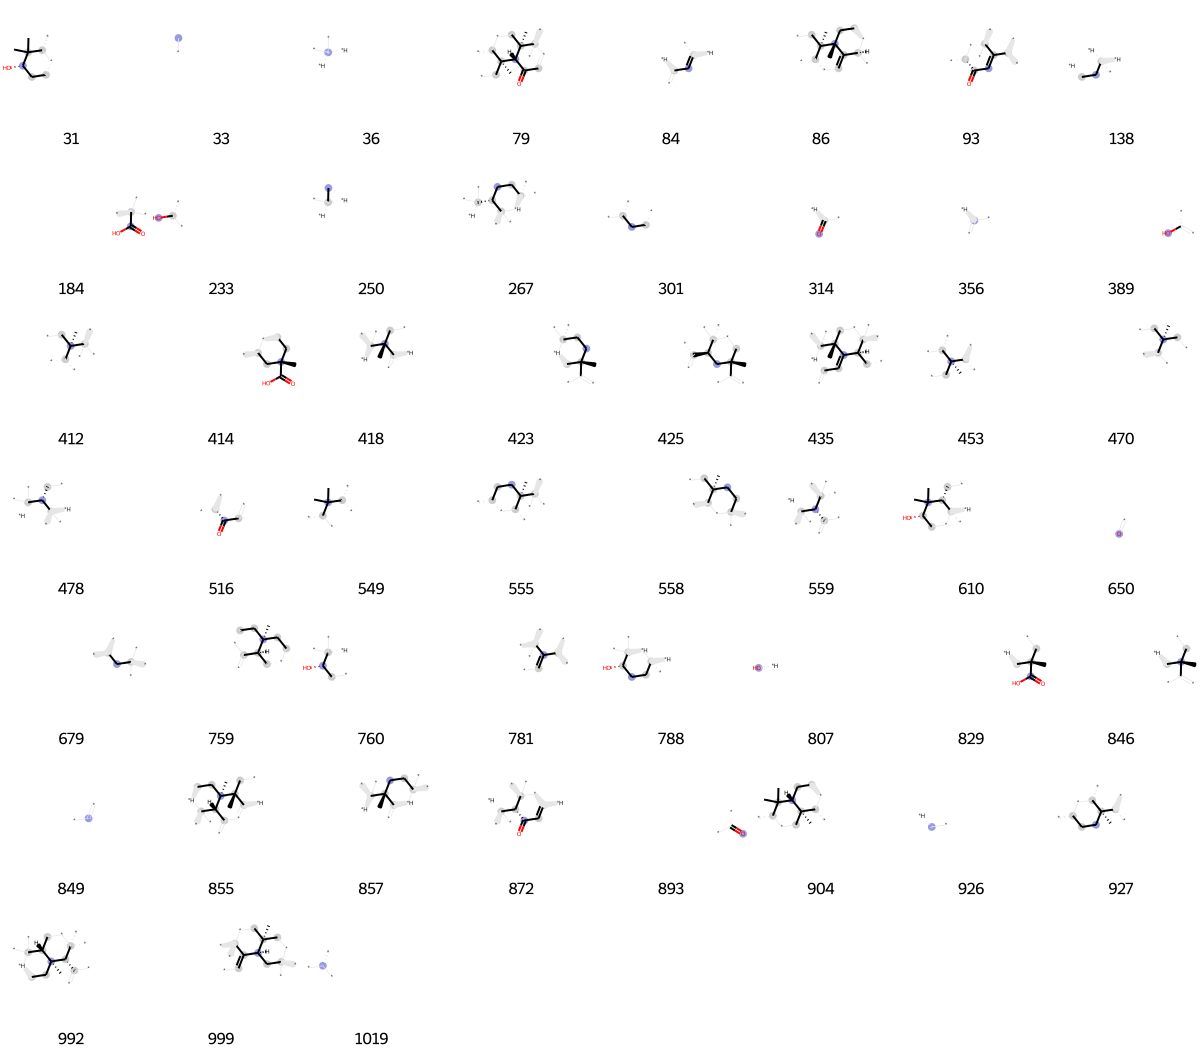

In [7612]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [7613]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[4,
 15,
 33,
 34,
 36,
 46,
 61,
 64,
 80,
 84,
 114,
 121,
 130,
 139,
 147,
 180,
 202,
 222,
 225,
 226,
 249,
 268,
 285,
 298,
 301,
 314,
 352,
 356,
 357,
 361,
 386,
 432,
 442,
 452,
 485,
 495,
 505,
 512,
 543,
 573,
 578,
 587,
 588,
 604,
 624,
 640,
 650,
 656,
 679,
 687,
 695,
 697,
 722,
 723,
 726,
 739,
 765,
 791,
 802,
 807,
 808,
 830,
 841,
 842,
 849,
 890,
 893,
 897,
 926,
 940,
 946,
 950,
 964,
 973,
 984,
 1019]

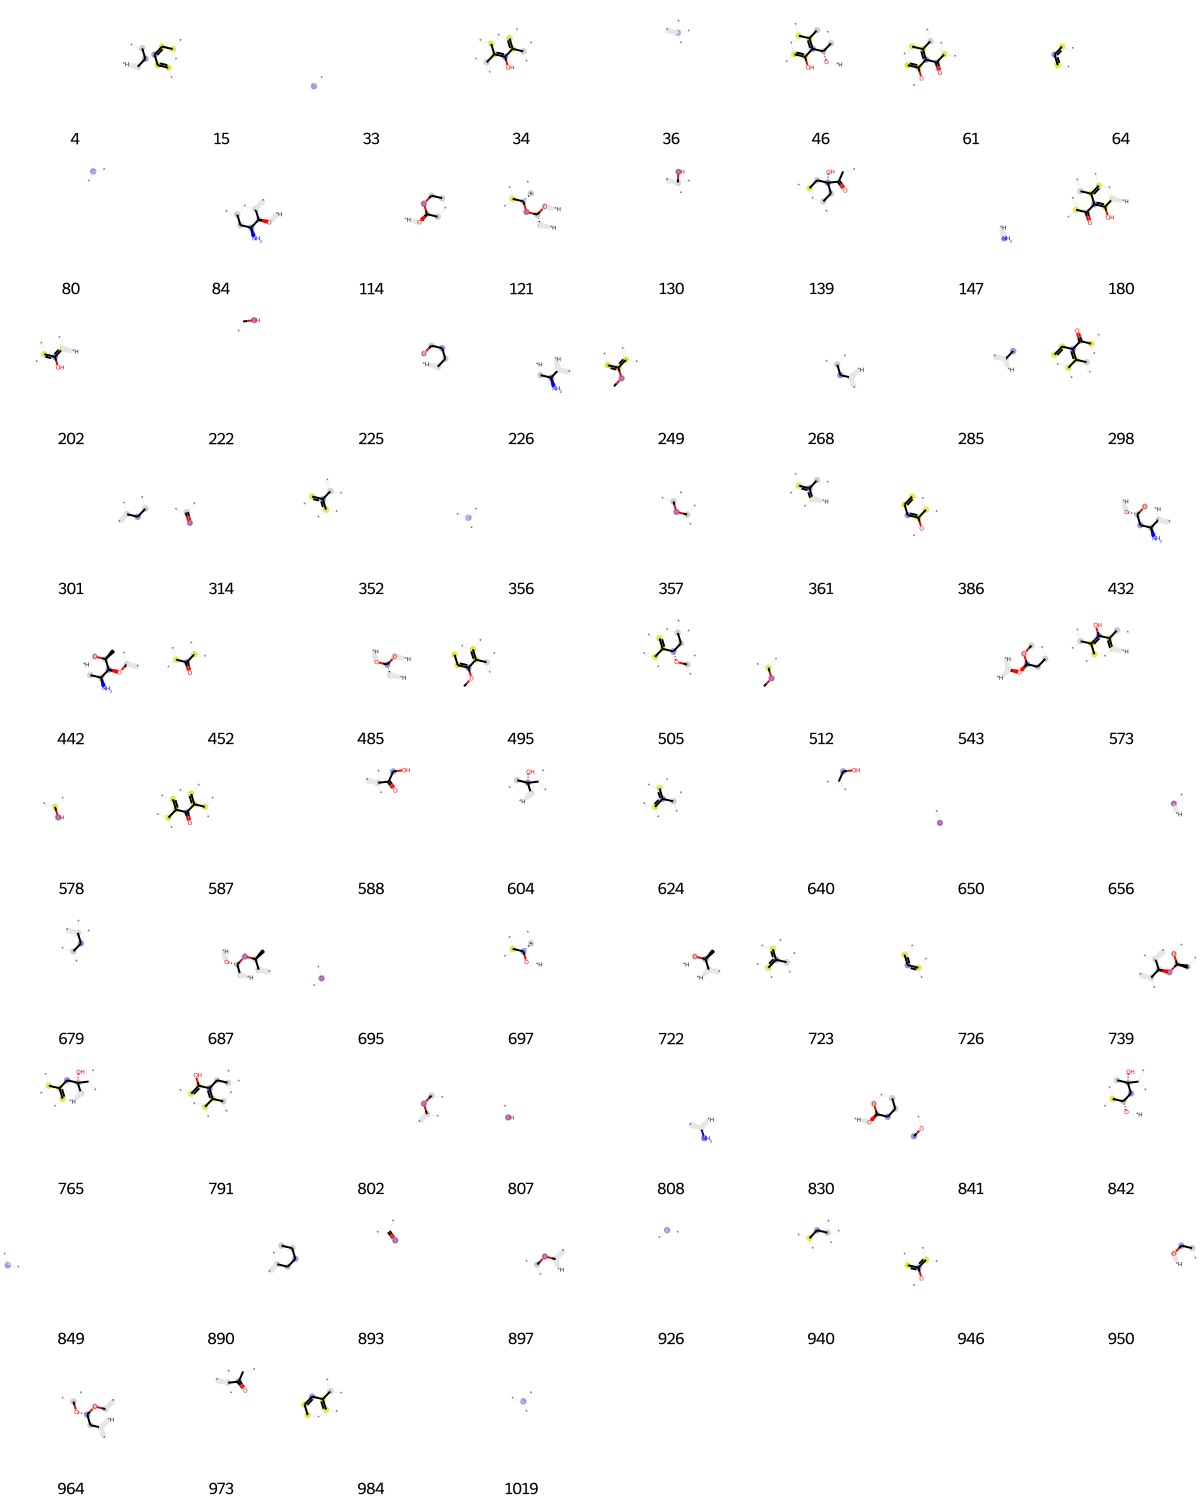

In [7614]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [7615]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[15,
 30,
 39,
 64,
 90,
 231,
 270,
 271,
 284,
 305,
 356,
 407,
 418,
 441,
 456,
 457,
 492,
 505,
 514,
 623,
 656,
 726,
 804,
 836,
 849,
 854,
 881,
 926,
 935,
 950,
 996]

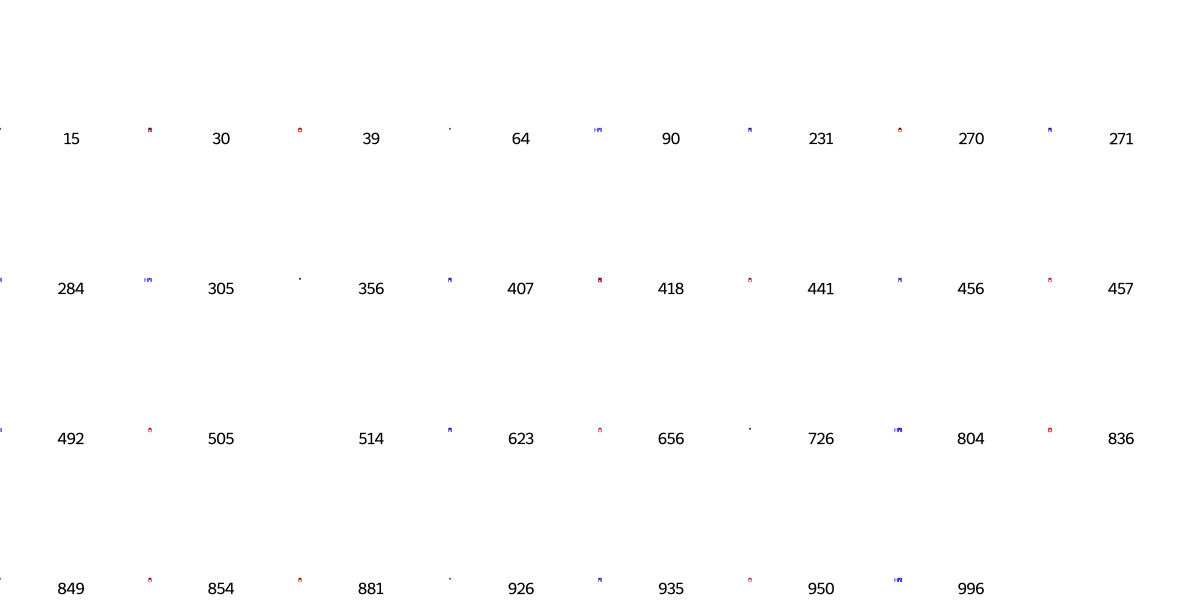

In [7616]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [7617]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[14,
 30,
 33,
 37,
 64,
 77,
 80,
 90,
 92,
 121,
 169,
 175,
 188,
 218,
 219,
 314,
 356,
 361,
 367,
 378,
 384,
 386,
 389,
 456,
 458,
 460,
 471,
 502,
 504,
 543,
 605,
 646,
 650,
 673,
 675,
 698,
 699,
 714,
 726,
 767,
 791,
 807,
 809,
 831,
 849,
 885,
 887,
 893,
 903,
 904,
 926,
 935,
 945,
 954,
 961,
 993,
 1010]

In [7618]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[2,
 10,
 13,
 33,
 64,
 80,
 102,
 112,
 139,
 175,
 232,
 274,
 289,
 294,
 322,
 356,
 361,
 389,
 428,
 434,
 571,
 578,
 652,
 673,
 688,
 693,
 695,
 718,
 726,
 745,
 754,
 804,
 807,
 815,
 849,
 881,
 898,
 927,
 961]

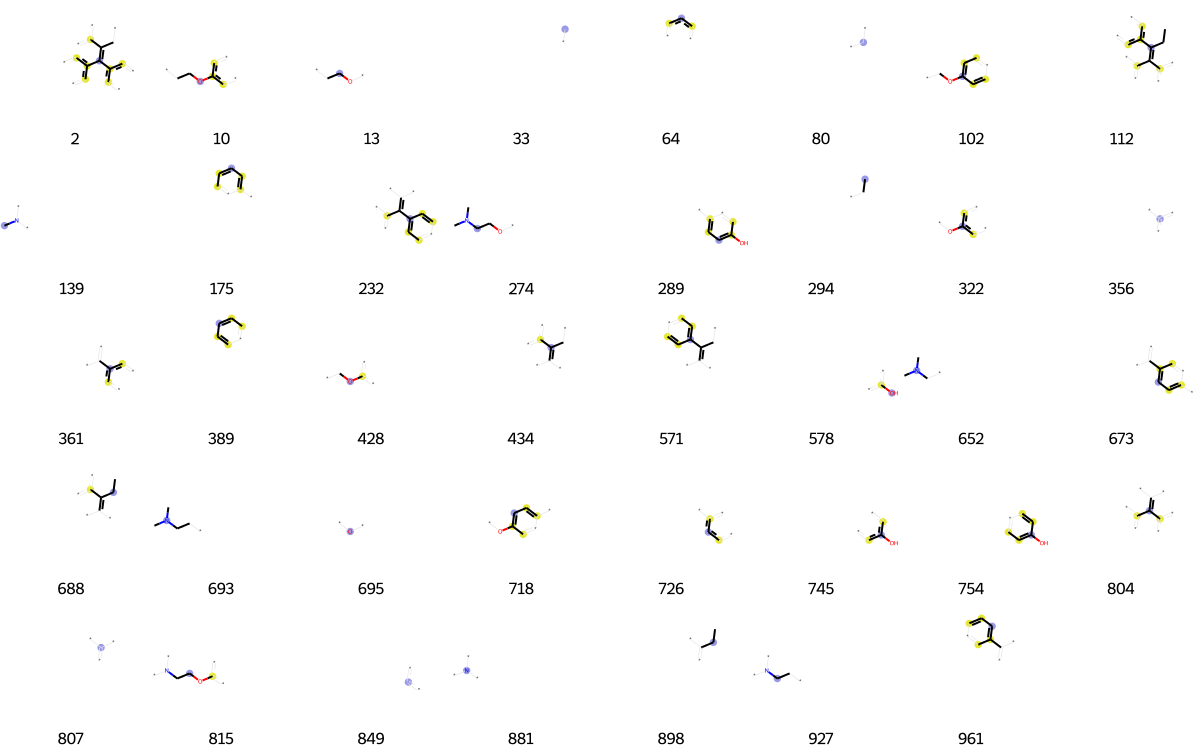

In [7619]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [7620]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[2,
 8,
 15,
 33,
 64,
 80,
 90,
 128,
 139,
 166,
 174,
 200,
 212,
 249,
 271,
 293,
 333,
 342,
 345,
 356,
 360,
 363,
 377,
 378,
 388,
 406,
 440,
 456,
 479,
 482,
 486,
 489,
 491,
 512,
 555,
 558,
 586,
 607,
 614,
 623,
 635,
 646,
 649,
 650,
 652,
 672,
 695,
 699,
 708,
 711,
 714,
 726,
 729,
 758,
 795,
 801,
 806,
 807,
 816,
 831,
 841,
 849,
 864,
 875,
 881,
 886,
 893,
 904,
 926,
 930,
 935,
 946,
 978,
 1009,
 1019]

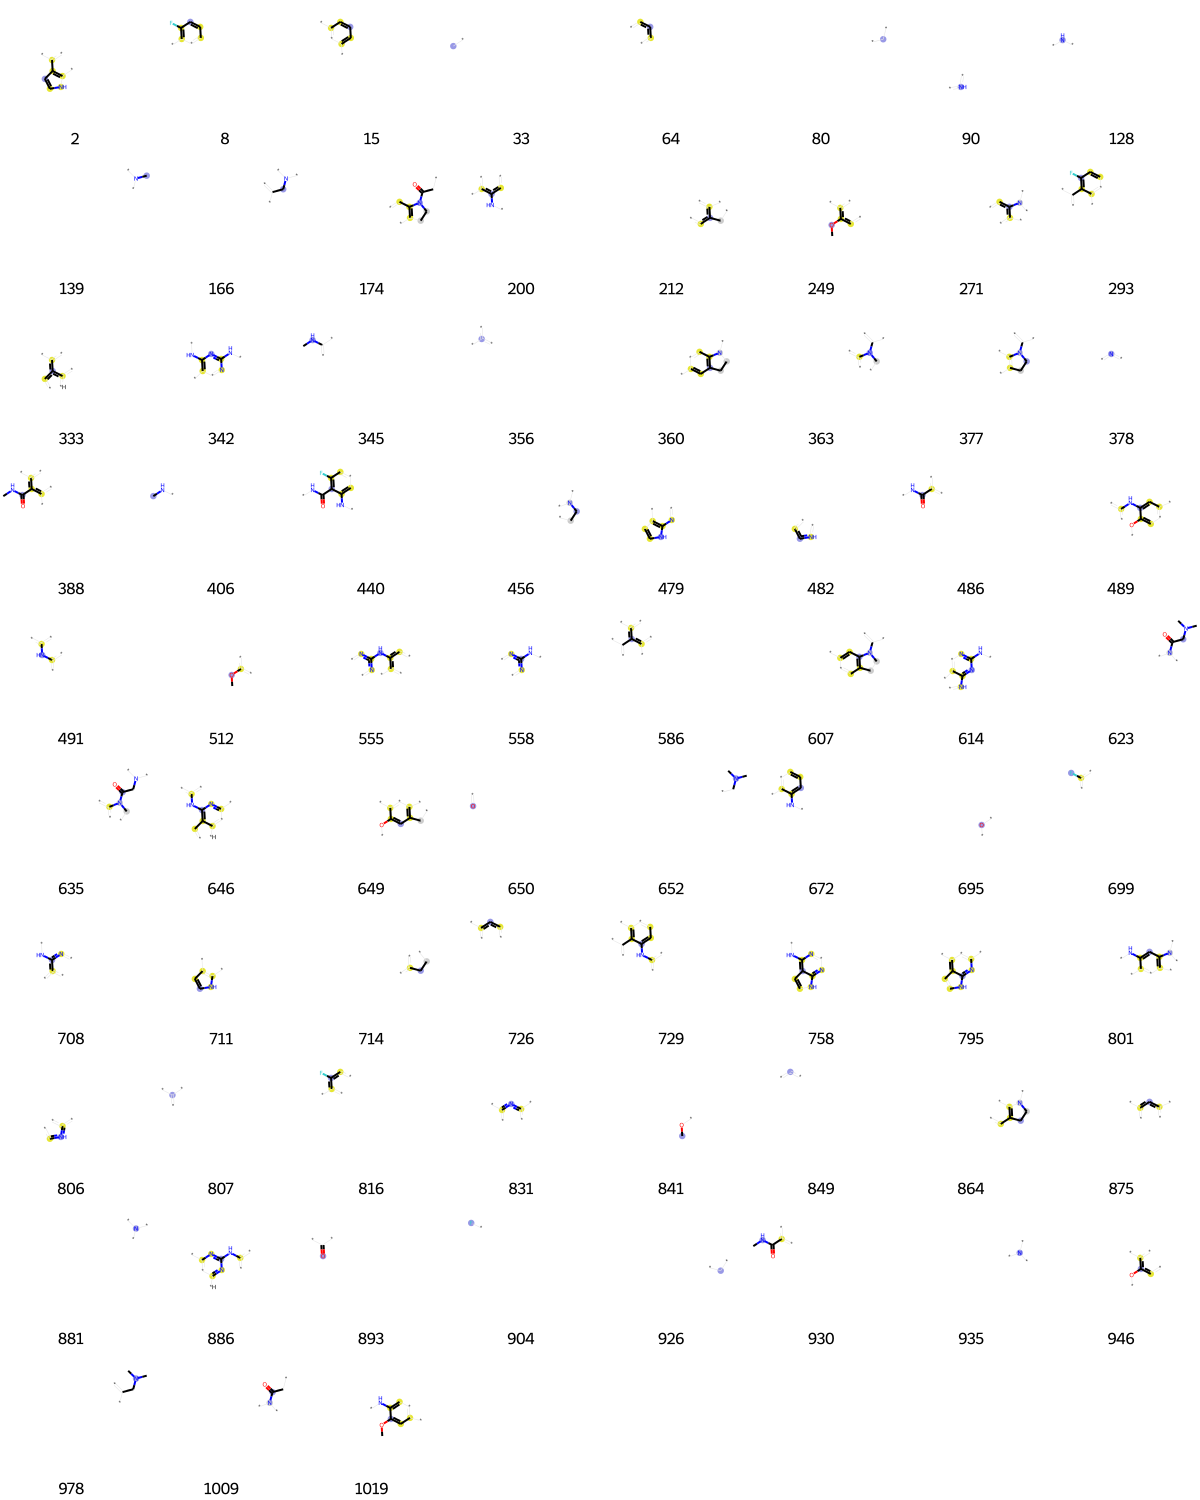

In [7621]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [7622]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 27,
 33,
 42,
 64,
 71,
 80,
 128,
 138,
 157,
 175,
 181,
 222,
 255,
 282,
 283,
 294,
 311,
 312,
 331,
 342,
 356,
 378,
 389,
 392,
 427,
 428,
 482,
 502,
 520,
 558,
 609,
 638,
 672,
 690,
 700,
 708,
 726,
 730,
 748,
 807,
 831,
 849,
 910,
 911,
 932,
 933,
 935,
 966,
 980]

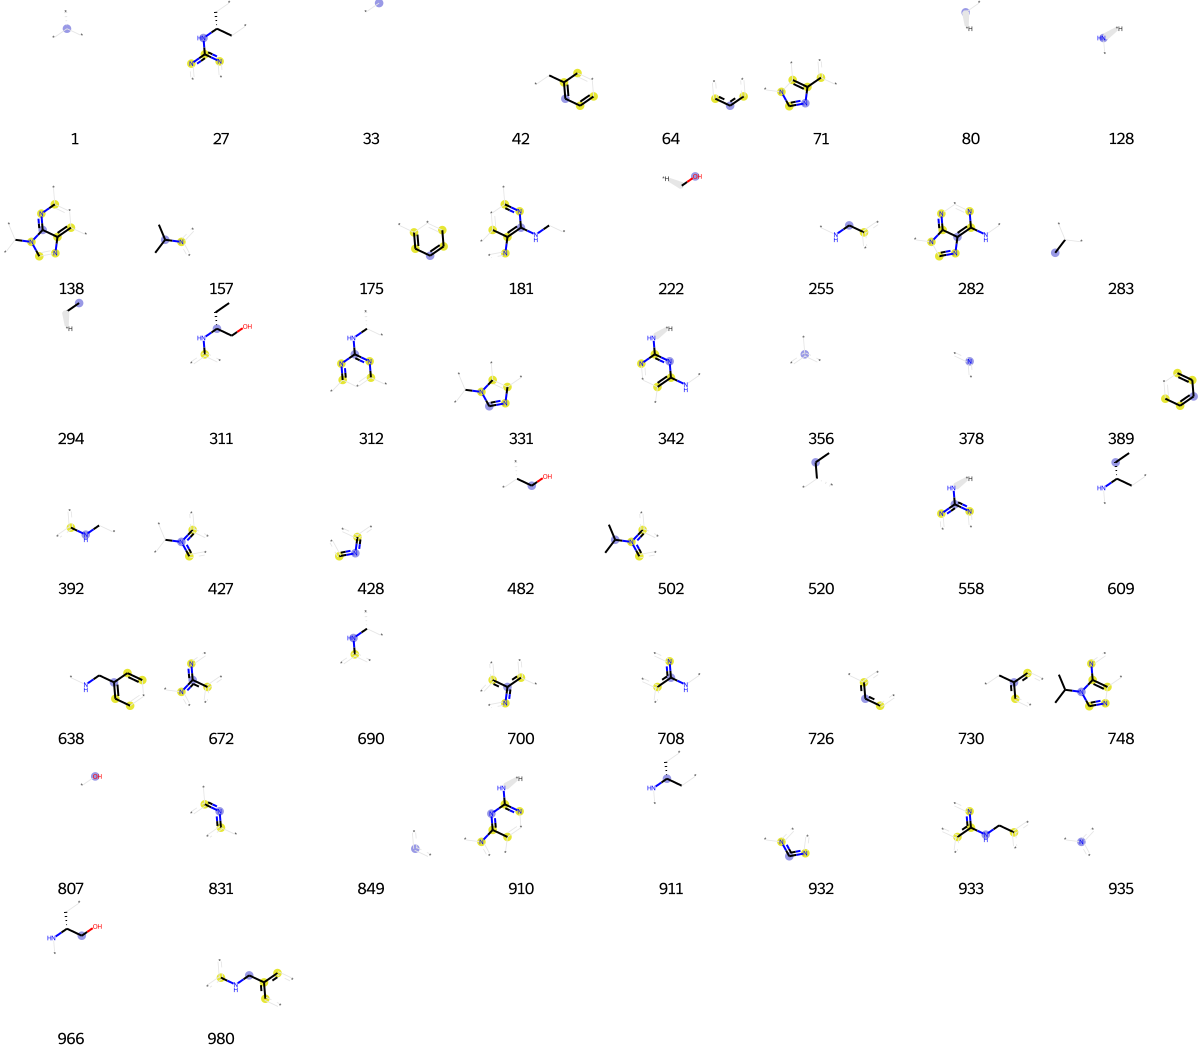

In [7623]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [7624]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[11,
 16,
 33,
 36,
 61,
 84,
 102,
 119,
 121,
 138,
 161,
 231,
 232,
 239,
 245,
 250,
 301,
 314,
 356,
 368,
 433,
 504,
 516,
 519,
 521,
 529,
 624,
 650,
 695,
 714,
 758,
 767,
 807,
 831,
 833,
 849,
 854,
 860,
 893,
 926,
 931,
 1017,
 1019]

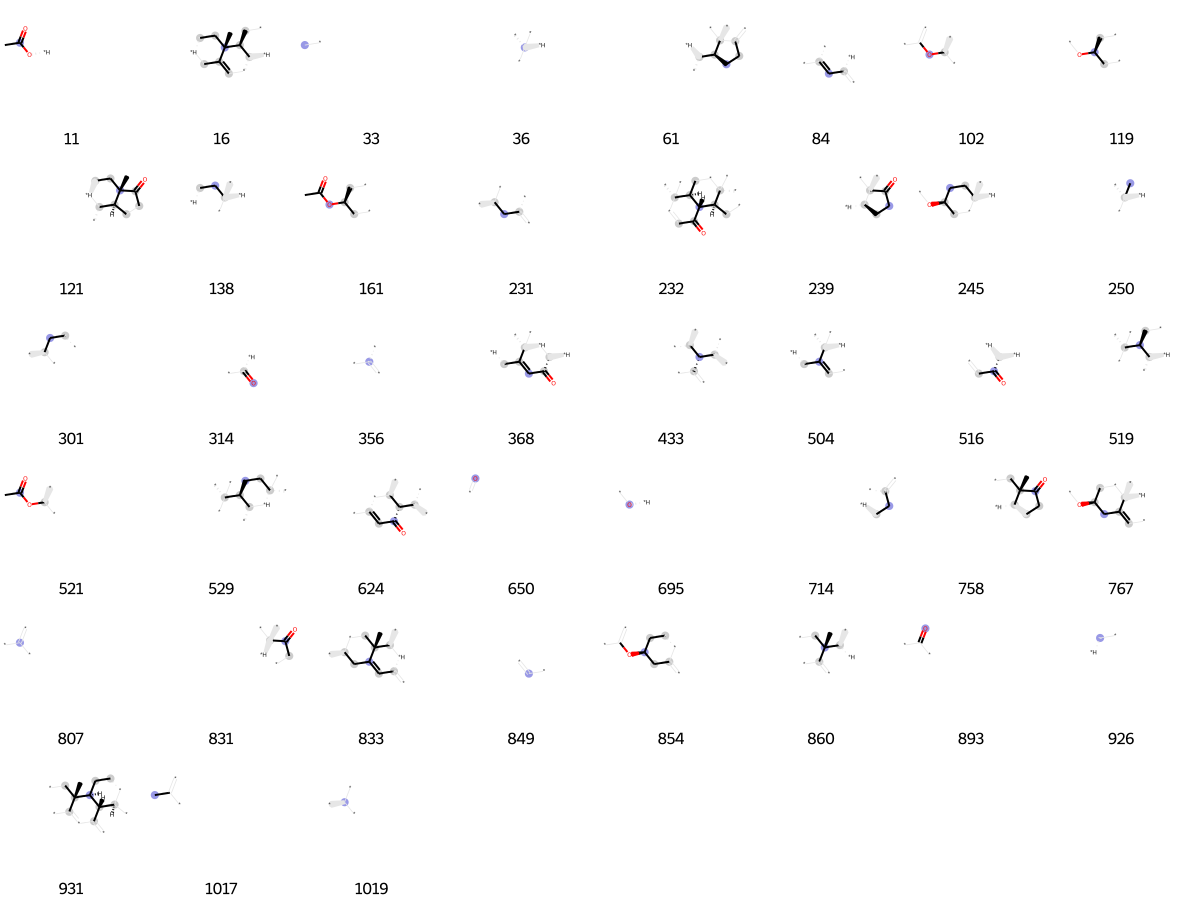

In [7625]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [7626]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[23,
 42,
 73,
 74,
 133,
 136,
 155,
 167,
 289,
 356,
 378,
 575,
 578,
 580,
 607,
 656,
 671,
 720,
 726,
 728,
 745,
 754,
 807,
 831,
 833,
 849,
 875,
 896,
 903,
 927,
 937]

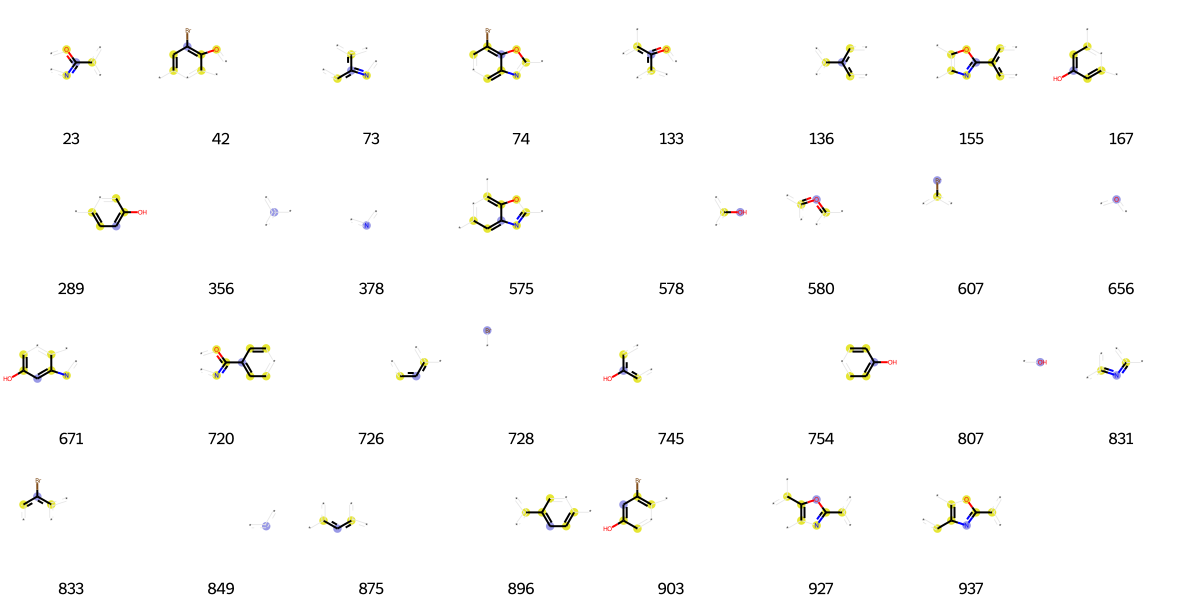

In [7627]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [7628]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 33,
 80,
 90,
 119,
 122,
 128,
 140,
 147,
 231,
 232,
 257,
 261,
 263,
 266,
 267,
 275,
 301,
 309,
 324,
 333,
 355,
 356,
 361,
 389,
 406,
 540,
 577,
 610,
 650,
 673,
 676,
 703,
 713,
 714,
 721,
 726,
 790,
 807,
 849,
 875,
 893,
 915,
 926,
 954,
 1002,
 1019]

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


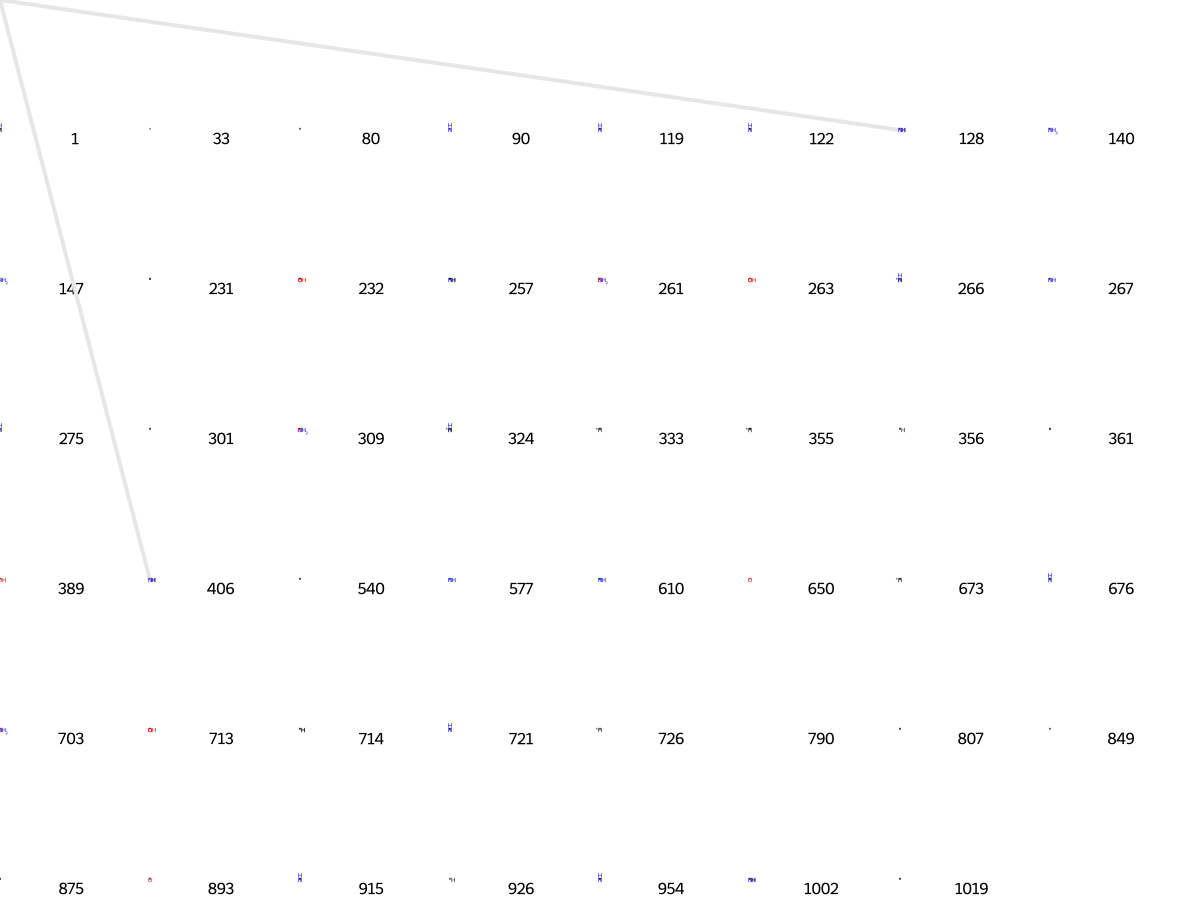

In [7629]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [7630]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[19,
 33,
 42,
 64,
 80,
 94,
 128,
 197,
 235,
 249,
 255,
 265,
 293,
 308,
 356,
 361,
 378,
 437,
 486,
 511,
 512,
 526,
 549,
 562,
 579,
 645,
 650,
 673,
 695,
 726,
 730,
 738,
 791,
 807,
 813,
 841,
 842,
 849,
 875,
 893,
 946,
 967]

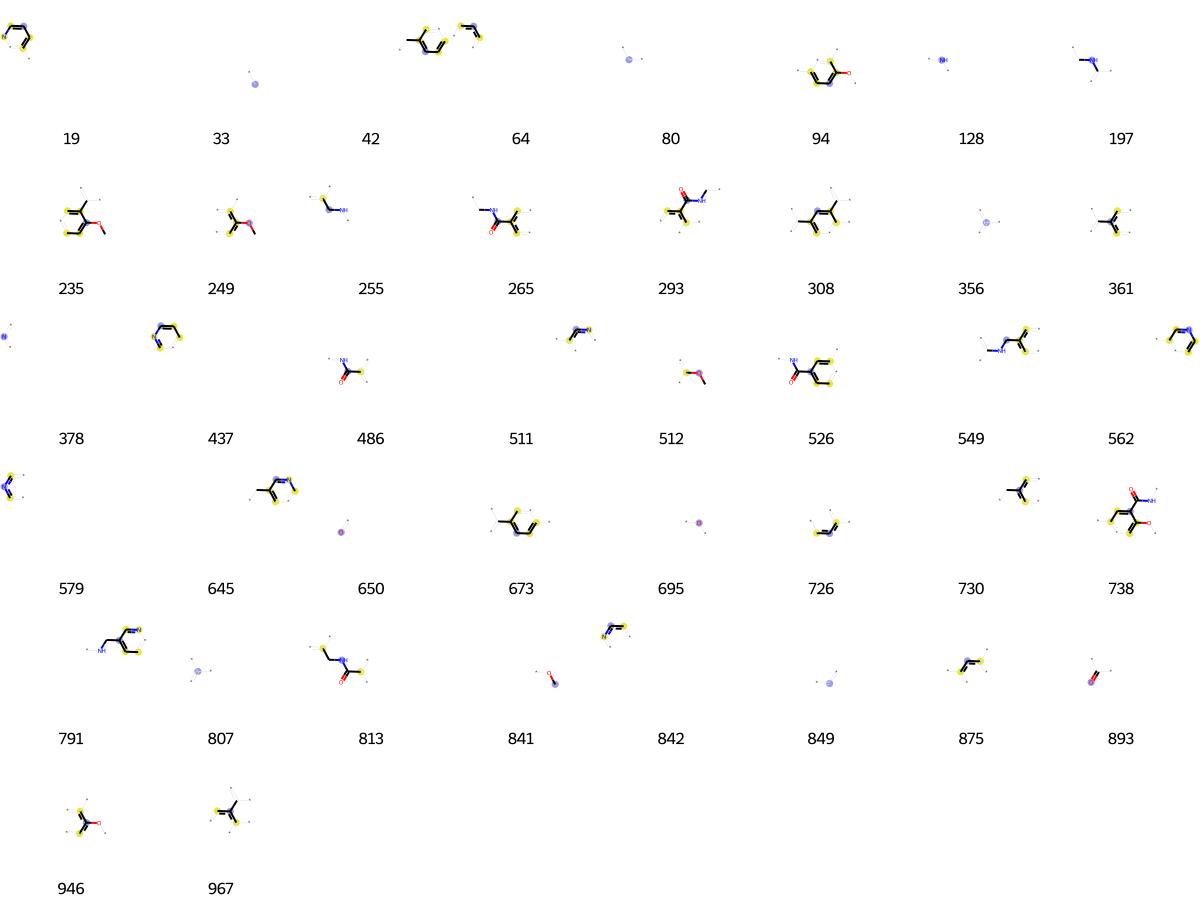

In [7631]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [7632]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[0,
 1,
 33,
 80,
 121,
 179,
 227,
 234,
 283,
 314,
 336,
 351,
 356,
 378,
 400,
 405,
 416,
 420,
 428,
 431,
 478,
 504,
 564,
 650,
 672,
 771,
 807,
 849,
 898,
 913,
 932,
 935]

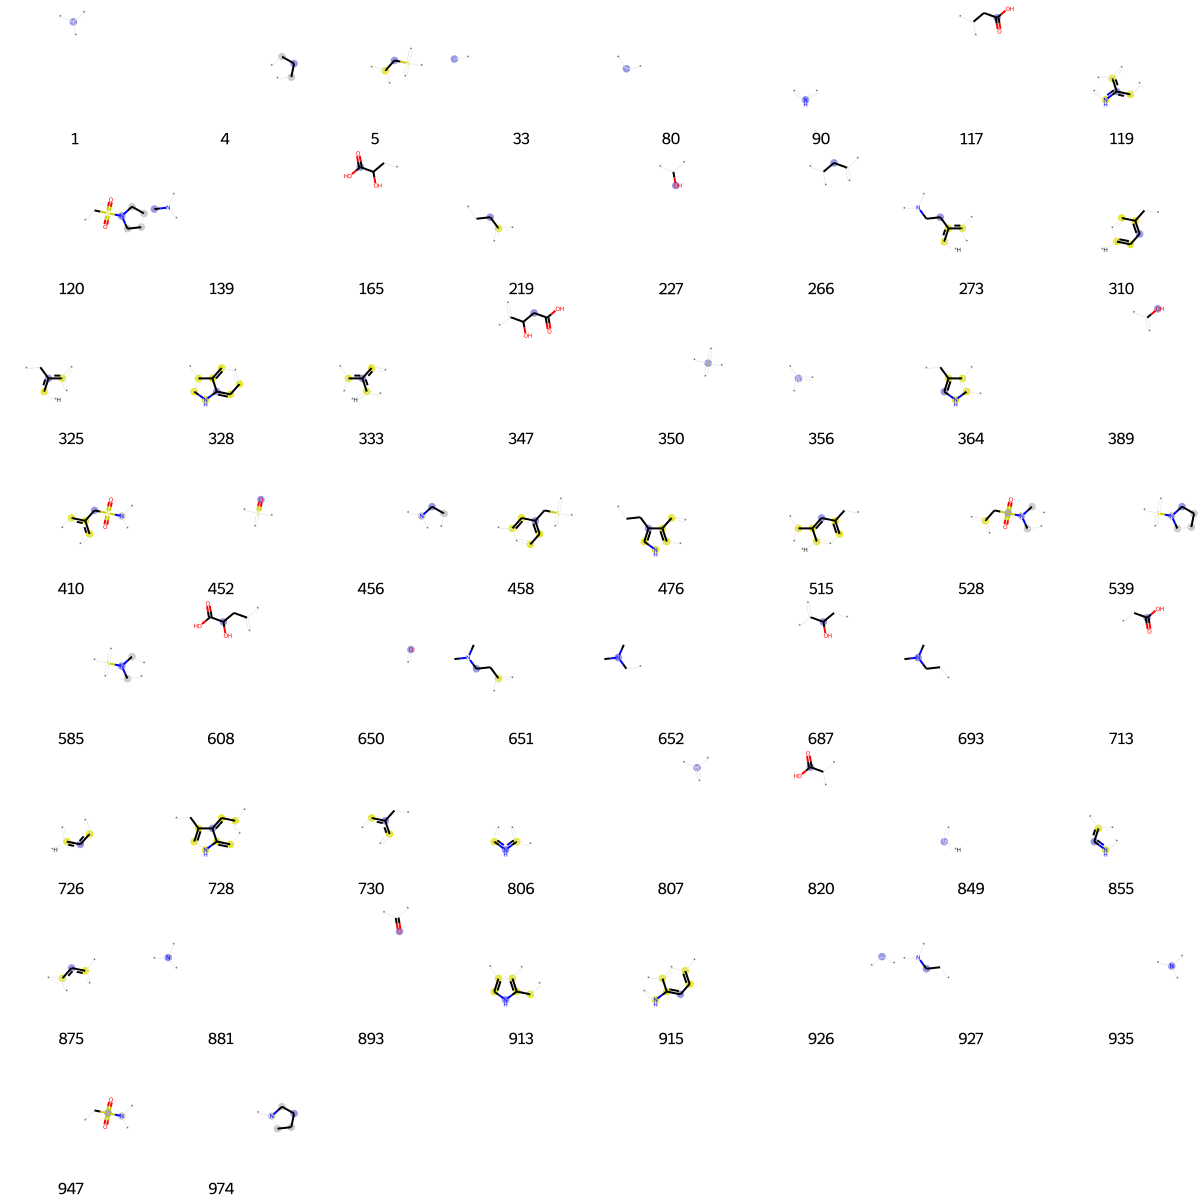

In [7633]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [7634]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[36,
 64,
 74,
 78,
 80,
 121,
 128,
 197,
 232,
 268,
 310,
 356,
 378,
 407,
 422,
 428,
 448,
 456,
 458,
 460,
 484,
 586,
 644,
 650,
 667,
 675,
 679,
 714,
 767,
 769,
 807,
 825,
 842,
 849,
 856,
 882,
 893,
 926,
 935,
 952,
 1004,
 1019]

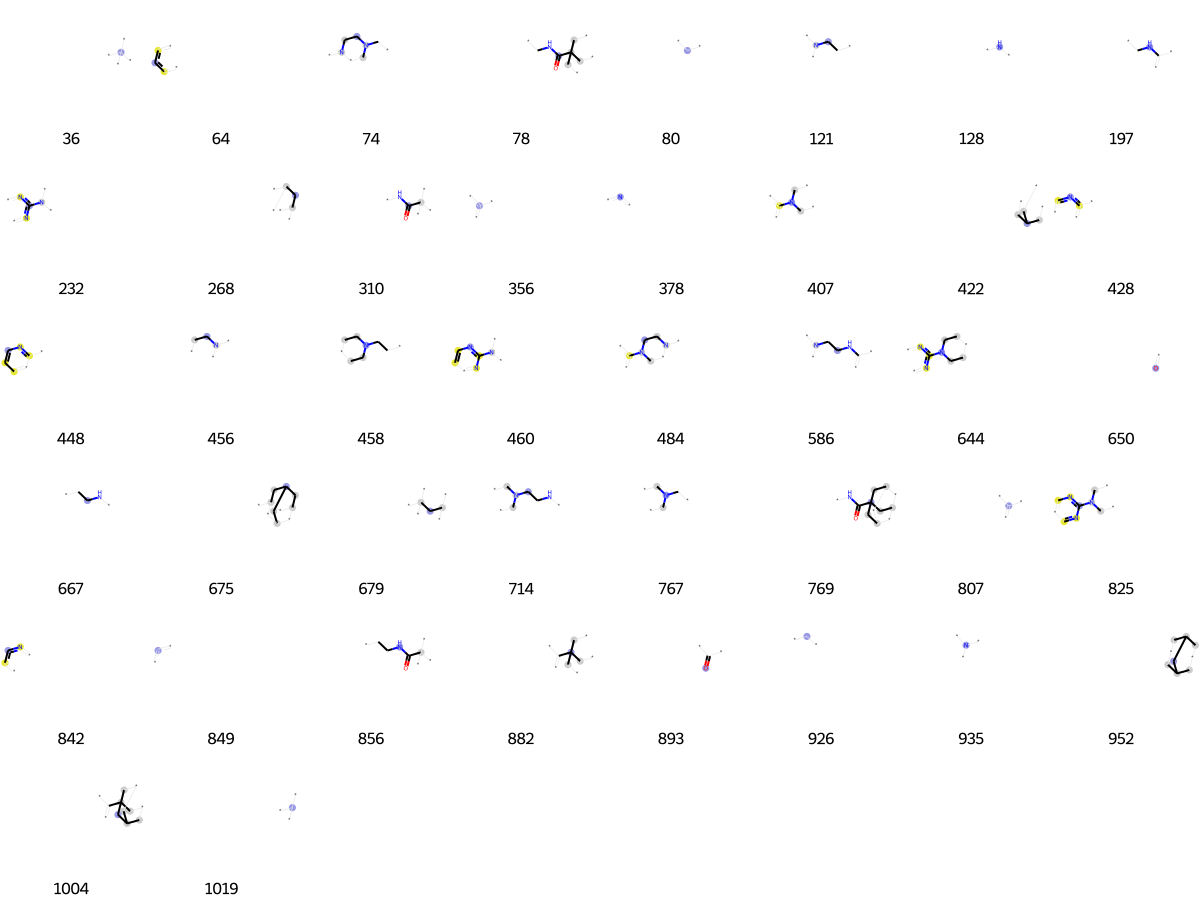

In [7635]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [7636]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[56,
 128,
 184,
 189,
 191,
 192,
 285,
 319,
 333,
 350,
 356,
 391,
 415,
 452,
 504,
 578,
 583,
 650,
 691,
 709,
 715,
 726,
 792,
 807,
 827,
 831,
 843,
 849,
 875,
 882,
 893,
 941,
 965,
 966]

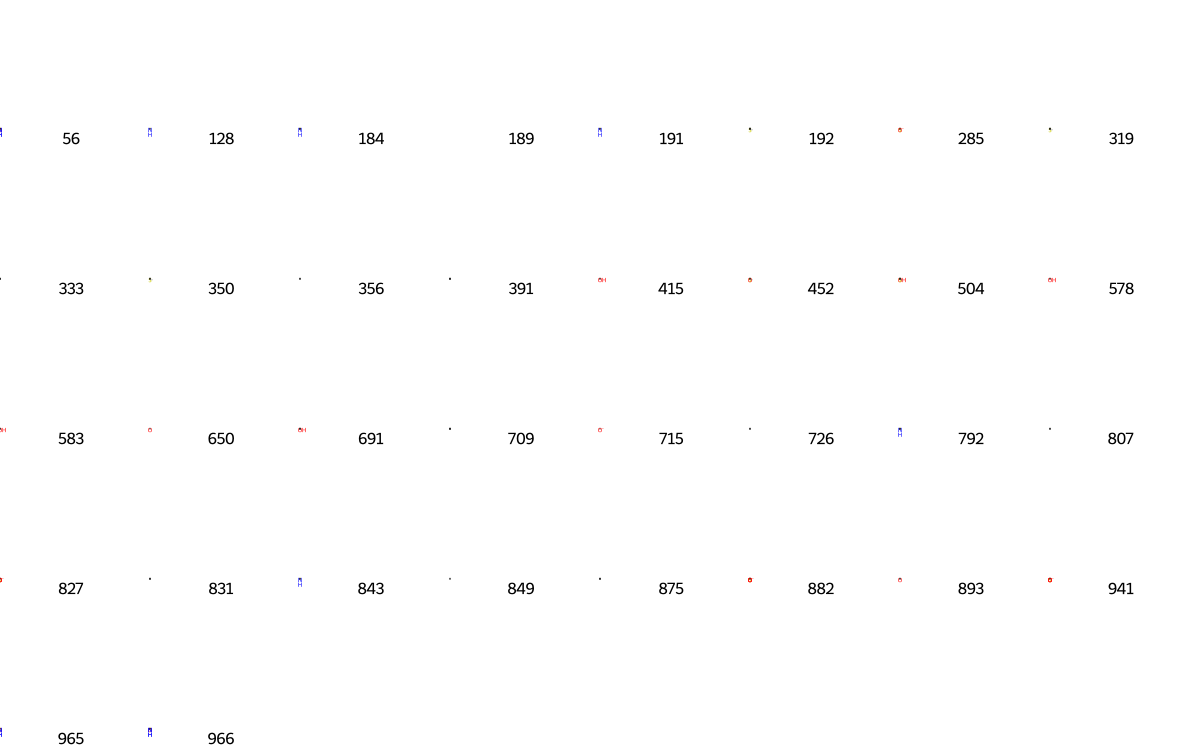

In [7637]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [7638]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[58, 80, 147, 493, 514, 816, 887, 981]

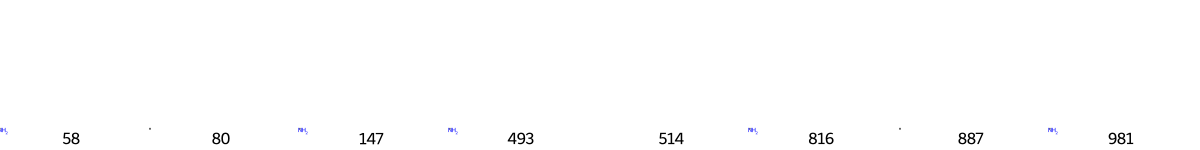

In [7639]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [7640]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 33,
 64,
 80,
 90,
 119,
 175,
 177,
 210,
 219,
 273,
 283,
 325,
 328,
 333,
 356,
 364,
 452,
 476,
 549,
 583,
 688,
 726,
 745,
 759,
 806,
 849,
 855,
 881,
 913,
 927]

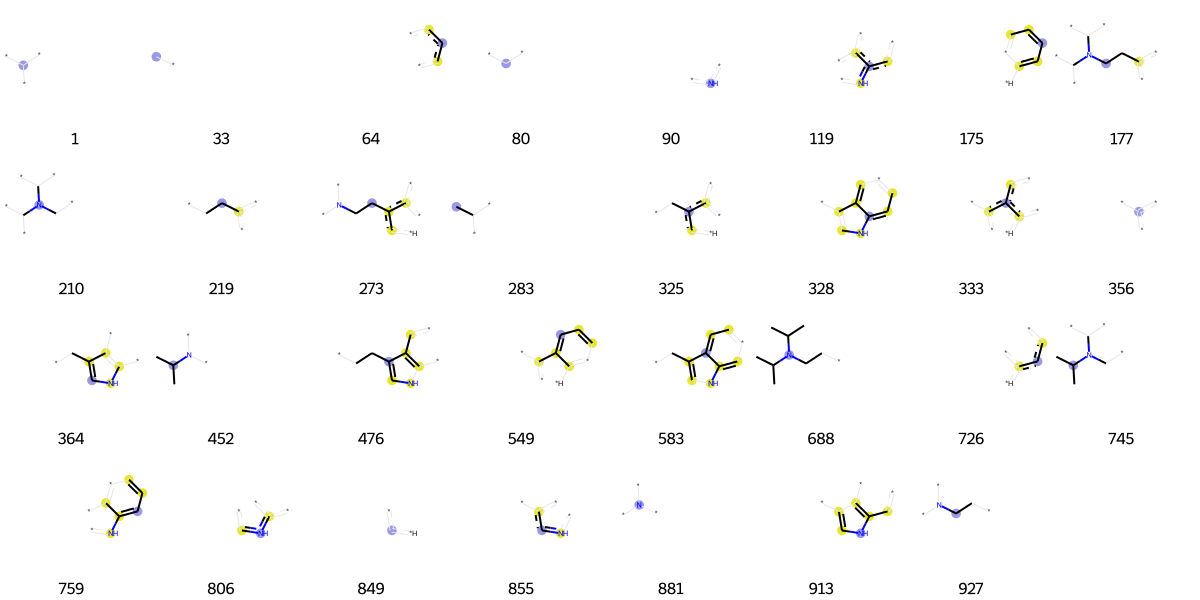

In [7641]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [7642]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[1,
 33,
 64,
 65,
 83,
 136,
 175,
 222,
 233,
 283,
 316,
 341,
 352,
 356,
 389,
 650,
 680,
 699,
 726,
 736,
 807,
 816,
 820,
 829,
 849,
 875,
 893,
 900,
 904,
 921,
 997]

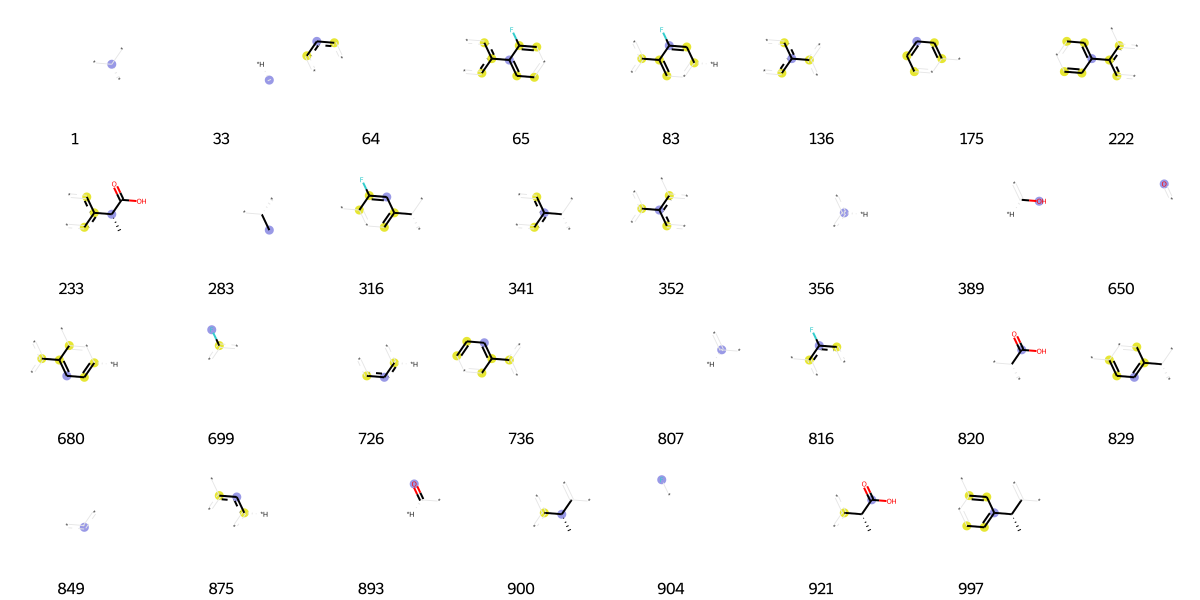

In [7643]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [7644]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[71,
 75,
 80,
 90,
 97,
 147,
 152,
 156,
 194,
 210,
 221,
 222,
 233,
 334,
 356,
 357,
 378,
 428,
 433,
 454,
 461,
 463,
 492,
 577,
 610,
 656,
 693,
 697,
 700,
 721,
 740,
 764,
 783,
 807,
 820,
 831,
 849,
 860,
 897,
 932,
 935,
 938,
 1019]

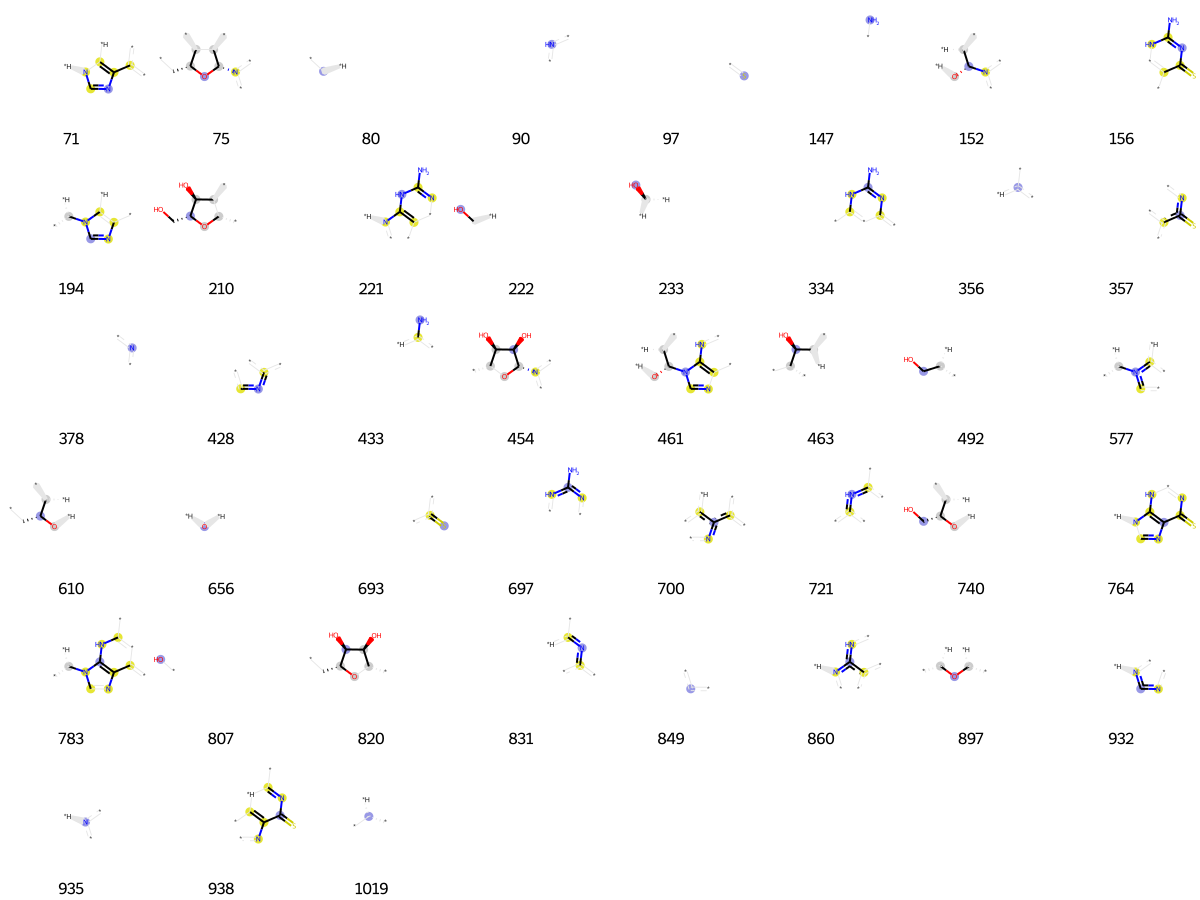

In [7645]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [7646]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[42,
 64,
 114,
 136,
 175,
 278,
 289,
 319,
 323,
 356,
 378,
 389,
 410,
 412,
 425,
 429,
 469,
 471,
 529,
 578,
 624,
 671,
 672,
 723,
 726,
 729,
 736,
 745,
 754,
 807,
 809,
 828,
 831,
 849,
 875,
 885,
 895,
 896,
 904,
 932,
 935,
 956]

In [7647]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[65,
 80,
 90,
 210,
 250,
 268,
 298,
 305,
 310,
 355,
 356,
 372,
 374,
 378,
 428,
 456,
 511,
 561,
 599,
 619,
 650,
 659,
 715,
 725,
 726,
 730,
 734,
 741,
 753,
 773,
 838,
 840,
 842,
 849,
 885,
 895,
 913,
 926,
 935,
 938,
 939]

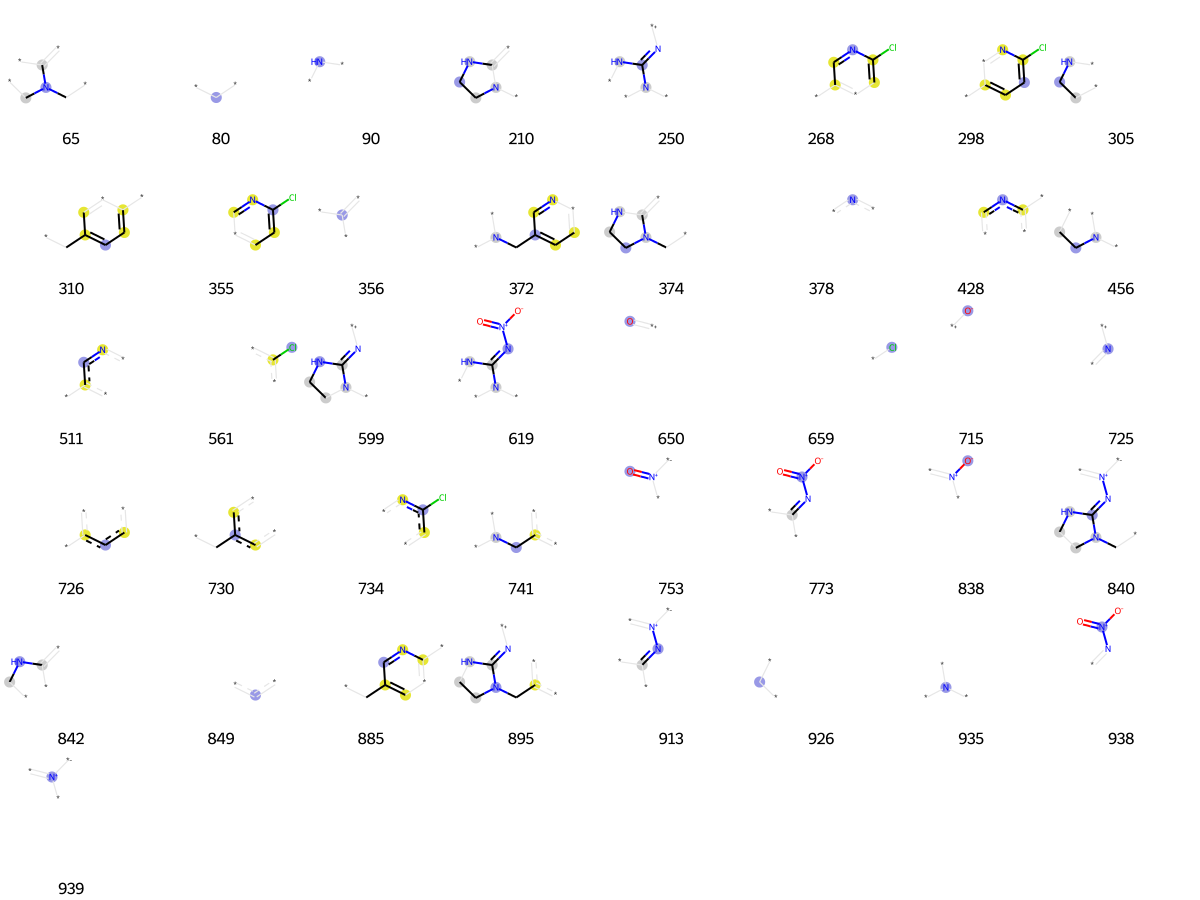

In [7648]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [7649]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[1,
 4,
 33,
 37,
 80,
 104,
 106,
 107,
 114,
 157,
 202,
 212,
 283,
 286,
 303,
 310,
 350,
 356,
 361,
 371,
 378,
 389,
 428,
 452,
 455,
 456,
 485,
 543,
 552,
 556,
 641,
 649,
 650,
 660,
 673,
 675,
 695,
 698,
 699,
 707,
 714,
 726,
 730,
 745,
 807,
 815,
 823,
 831,
 836,
 849,
 875,
 877,
 881,
 892,
 893,
 900,
 926,
 946,
 985,
 994,
 1017,
 1018]

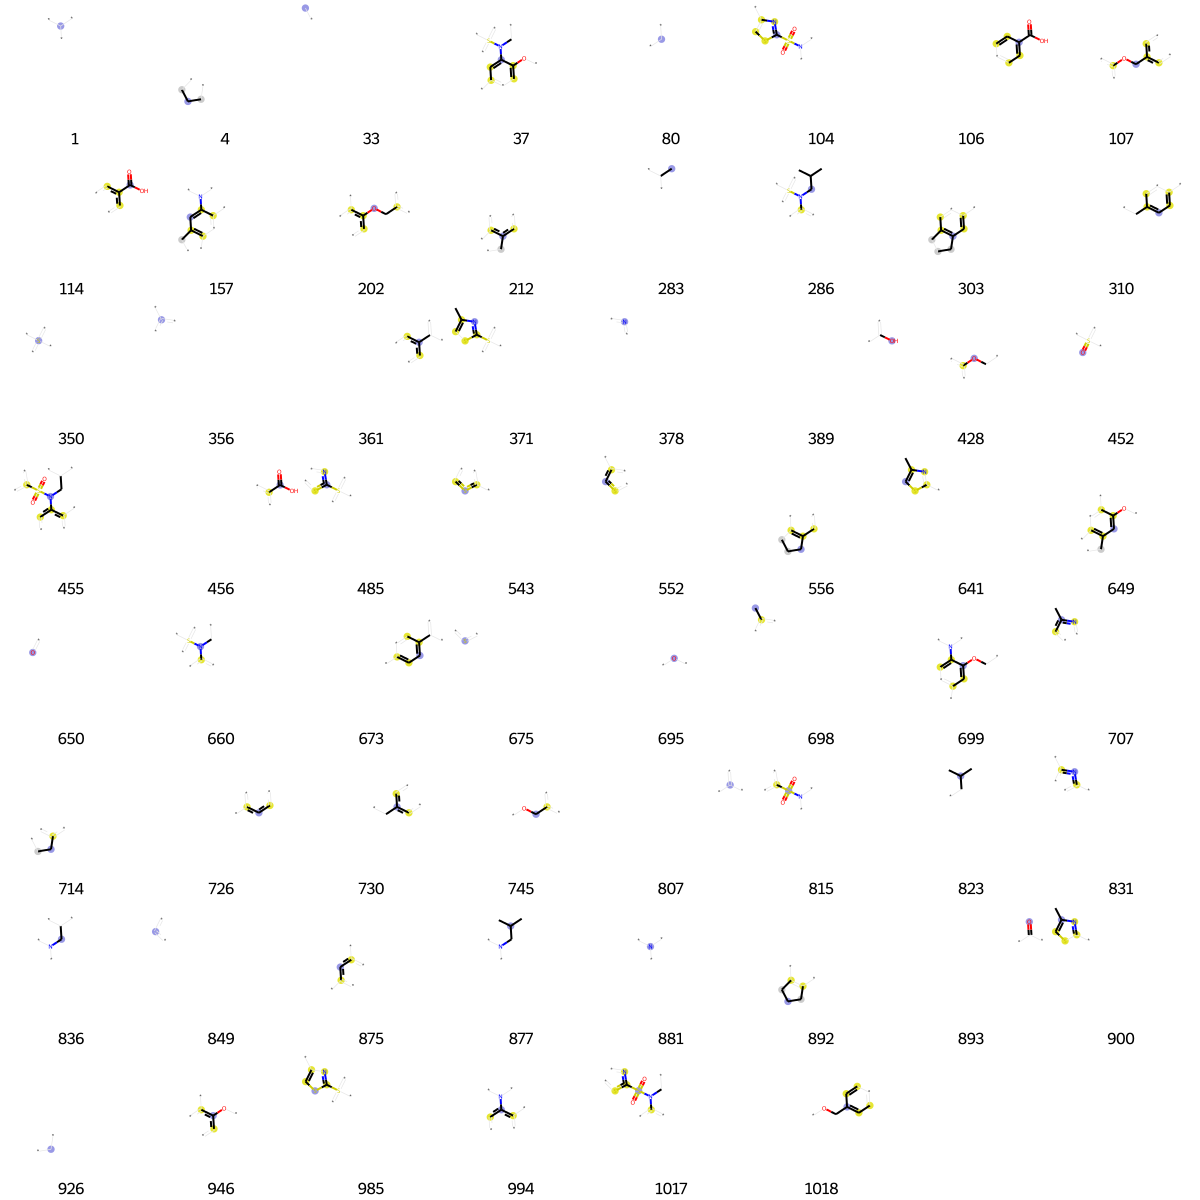

In [7650]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [7651]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 64,
 127,
 131,
 175,
 189,
 285,
 322,
 341,
 350,
 356,
 378,
 428,
 448,
 452,
 501,
 567,
 650,
 695,
 706,
 715,
 717,
 718,
 726,
 829,
 842,
 845,
 849,
 852,
 924,
 964,
 967,
 1002,
 1019]

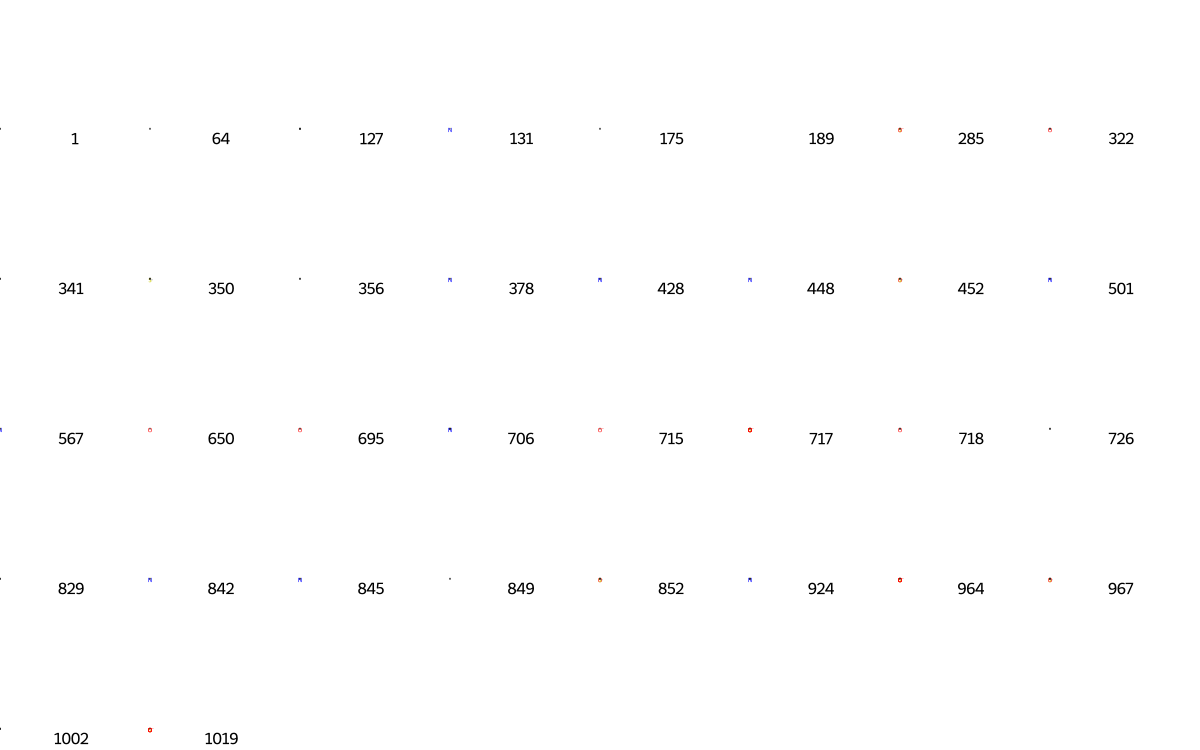

In [7652]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])